<div align="center">

# Energy-consumption-related indices from CMIP6 Global Climate Models

<br>
</div>



<div align="center">
    
## Use case 3 : Assessing possible impacts of climate change on energy demand in Europe

#### - How well do the CMIP6 projections represent Energy Degree Days trends over a historic period? 
#### - What is the uncertainty associated with projected future changes to these indices? 

<br>


## General abstract
In this notebook, data from a subset of 9 models of [CMIP6](https://confluence.ecmwf.int/display/CKB/CMIP6%3A+Global+climate+projections) Global Climate Models (GCM), as well as [ERA5](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-complete?tab=doc) reanalysis, are considered. Two energy-consumption-related indices are calculated using the [icclim](https://icclim.readthedocs.io/en/stable/) Python package: Cooling and Heating Degree Days (CDDs and HDDs respectively). The reference methodology used here is similar to the one followed by Scoccimarro et al., [2023](https://doi.org/10.1038/s43247-023-00878-3). However the thermal comfort thresholds used in this notebook are slightly different. A winter comfort temperature of 15.5°C and a summer comfort temperature of 22.0°C are used here (as in the [CDS application](https://datastore.copernicus-climate.eu/documents/app-heating-cooling-degree-days/C3S_EEA_HDD_CDD_application_user_guide_v0.9.pdf)). These comfort temperatures remain constant across Europe. A higher number of Heating Degree Days (HDD) indicates that outdoor temperatures fall below the winter comfort threshold, necessitating more energy to heat buildings. Similarly, a higher number of Cooling Degree Days (CDD) indicates outdoor temperatures exceeding the summer comfort level, requiring increased energy for cooling buildings. In the presented code, the CDD calculations are always based on the JJA aggregation, with a comfort temperature of 22°C (CDD22), while HDD calculations focus on winter (DJF) with a comfort temperature of 15.5°C (HDD15.5). More specifically, to calculate CDD22, the sum of the differences between the daily mean temperature and the thermal comfort temperature of 22°C is computed. This calculation occurs only when the mean temperature is above the thermal comfort level; otherwise, the CDD22 for that day is set to 0. Similarly, to calculate HDD15.5, the sum of the differences between the thermal comfort temperature of 15.5°C and the daily mean temperature is determined. This happens only when the mean temperature is below the thermal comfort level; otherwise, the HDD15.5 for that day is set to 0. Finally, the sum is averaged with the number of days in the season to obtain a daily average value. In Spinoni et al., [2018](https://doi.org/10.1002/joc.5362), more advanced methods for calculating CDD and HDD involve considering maximum, minimum, and mean temperatures. However, to prevent overloading the notebook and maintain simplicity while ensuring compatibility with the [icclim](https://icclim.readthedocs.io/en/stable/) Python package, we opted to utilize a single variable (2m mean temperature).


This notebook is subdivided into three sections, hereafter referred to as sub-notebooks, each focusing on a different assessment necessary to address the user's questions properly.


## Sub-notebooks

Here we present the three sub-notebooks necessary to address the user's questions properly.  You can refer to any of them to view the sub-notebook output:

* [1. HISTORICAL PERIOD NOTEBOOK](#1.-HISTORICAL-PERIOD-NOTEBOOK)
* [2. FUTURE PERIOD NOTEBOOK](#2.-FUTURE-PERIOD-NOTEBOOK)
* [3. GLOBAL WARMING LEVELS NOTEBOOK](#3.-GLOBAL-WARMING-LEVELS-NOTEBOOK)


<a id='INITIAL NOTE'></a>
<div class="alert alert-block alert-warning">  
<b>IMPORTANT</b>:<br> 
These sub-notebooks were designed to be run individually since they handle a large amount of data and utilize different approaches and methods. They are grouped together because the results of all three complement each other and provide an overview that can collectively address the user's questions. Running the entire notebook at once may lead to heavy processing. Therefore, please consider focusing on just one of the three sub-notebooks presented here.

<br>
<br>
<div align="center">

# 1. HISTORICAL PERIOD NOTEBOOK

## Outline of the sub-notebook 1  

*  [1.1. Abstract](#1.1.-Abstract)
*  [1.2. Methods and analyses](#1.2.-Methods-and-analyses)
*  [1.3. Take home messages](#1.3.-Take-home-messages)
*  [1.4. Parameters, requests and functions definition](#1.4.-Parameters,-requests-and-functions-definition)
     *  [1.4.1. Import packages](#1.4.1.-Import-packages)
     *  [1.4.2. Define Parameters](#1.4.2.-Define-Parameters)
     *  [1.4.3. Define models](#1.4.3.-Define-models)
     *  [1.4.4. Define ERA5 request](#1.4.4.-Define-ERA5-request)
     *  [1.4.5. Define model requests](#1.4.5.-Define-model-requests)
     *  [1.4.6. Functions to cache](#1.4.6.-Functions-to-cache)
*  [1.5. Downloading and processing](#1.5.-Downloading-and-processing)
     *  [1.5.1. Download and transform ERA5](#1.5.1.-Download-and-transform-ERA5)
     *  [1.5.2. Download and transform models](#1.5.2.-Download-and-transform-models)
     *  [1.5.3. Apply land-sea mask and change attributes](#1.5.3.-Apply-land-sea-mask,-change-attributes-and-cut-the-region-to-show)
*  [1.6. Plotting section](#1.6.-Plotting-section)
     *  [1.6.1. Define plotting function](#1.6.1.-Define-plotting-function)
     *  [1.6.2. Plot ensemble maps](#1.6.2.-Plot-ensemble-maps)
     *  [1.6.3. Plot model maps](#1.6.3.-Plot-model-maps)
     *  [1.6.4 Plot bias maps](#1.6.4-Plot-bias-maps)
     *  [1.6.5. Boxplots of the historical trend and the trend bias](#1.6.5.-Boxplots-of-the-historical-trend-and-the-trend-bias)

## 1.1. Abstract 

In this sub-notebook, data from a subset of 9 models of [CMIP6](https://confluence.ecmwf.int/display/CKB/CMIP6%3A+Global+climate+projections) Global Climate Models (GCM), as well as [ERA5](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-complete?tab=doc) reanalysis, are considered. Two energy-consumption-related indices are calculated using the [icclim](https://icclim.readthedocs.io/en/stable/) Python package: Cooling and Heating Degree Days (CDDs and HDDs respectively). The reference methodology used here is similar to the one followed by Scoccimarro et al., [2023](https://doi.org/10.1038/s43247-023-00878-3). However the thermal comfort thresholds used in this sub-notebook are slightly different. A winter comfort temperature of 15.5°C and a summer comfort temperature of 22.0°C are used here (as in the [CDS application](https://datastore.copernicus-climate.eu/documents/app-heating-cooling-degree-days/C3S_EEA_HDD_CDD_application_user_guide_v0.9.pdf)). These comfort temperatures remain constant across Europe. A higher number of Heating Degree Days (HDD) indicates that outdoor temperatures fall below the winter comfort threshold, necessitating more energy to heat buildings. Similarly, a higher number of Cooling Degree Days (CDD) indicates outdoor temperatures exceeding the summer comfort level, requiring increased energy for cooling buildings. In the presented code, the CDD calculations are always based on the JJA aggregation, with a comfort temperature of 22°C (**CDD22**), while HDD calculations focus on winter (DJF) with a comfort temperature of 15.5°C (**HDD15.5**). More specifically, to calculate CDD22, the sum of the differences between the daily mean temperature and the thermal comfort temperature of 22°C is computed. This calculation occurs only when the mean temperature is above the thermal comfort level; otherwise, the CDD22 for that day is set to 0. Similarly, to calculate HDD15.5, the sum of the differences between the thermal comfort temperature of 15.5°C and the daily mean temperature is determined. This happens only when the mean temperature is below the thermal comfort level; otherwise, the HDD15.5 for that day is set to 0. Finally, the sum is averaged with the number of days in the season to obtain a daily average value. In Spinoni et al., [2018](https://doi.org/10.1002/joc.5362), more advanced methods for calculating CDD and HDD involve considering maximum, minimum, and mean temperatures. However, to prevent overloading the sub-notebook and maintain simplicity while ensuring compatibility with the [icclim](https://icclim.readthedocs.io/en/stable/) Python package, we opted to utilize a single variable (2m mean temperature).

The indices calculations are performed over the **historical period from 1971 to 2000**. After calculating these indices for the historical period (resulting in index values per year), temporal means and trends are calculated. Following this, the bias of the temporal mean values and the trend bias are calculated, using ERA5 as the reference dataset. These biases are displayed for each model and for the ensemble median. Additionally, maps of the ensemble spread (derived as the standard deviation of the ensemble members' distribution) are calculated and displayed for the mean values and for the trends. Finally, boxplots which represent statistical distributions (PDF) built on the historical trend from each considered model are shown (also in this case ERA 5 is considered as reference product). 

Within this sub-notebook, the displayed values always represent the daily average over the respective season.

The size and location of the subdomain considered are customizable, as well as the temporal aggregation (annual or seasonal).

## 1.2. Methods and analyses

This sub-notebook performs the following analyses:

- Maps representing the spatial distribution of the **historical mean values** (1971-2000) of the indices 'HDD15.5' and 'CDD22' for ERA5, each model individually, the ensemble median, and the ensemble spread.
- Maps representing the spatial distribution of the **historical trends** (1971-2000) of the considered indices. Similar to the first analysis, this includes ERA5, each model individually, the ensemble median, and the ensemble spread.
- **Bias maps of the historical mean values**.
- **Trend bias maps**. 
- **Boxplots** which represent statistical distributions (PDF) built on the historical trend from each considered model. Also in this case ERA 5 is considered as reference product.
- **Boxplots of the trend bias** which illustrates the spatially-averaged trend bias for each model.


## 1.3. Take home messages

- Global Climate Models (GCMs) exhibit biases in capturing both mean values and trends for the energy-consumption-related indices considered within this sub-notebook
  
- Biases are observed in the daily average of 'Heating Degree Days' (HDD15.5) over DJF and 'Cooling Degree Days' (CDD22) over JJA.
  
- GCMs struggle to accurately represent these indices in regions with complex orography, specially for the mean values of the HDD15.5 index.
  
- There is a common overestimation of HDD15.5 mean values for DJF, especially in continental and northern areas. Conversely, underestimation is evident in mountainous regions and in some western zones.
  
- Overestimation of CDD22 mean values for JJA across most of the Mediterranean Basin (except some Saharan regions).
  
- The ERA5 historical trend exhibits a reduction in Heating Degree Days for DJF across most of Europe. However, while the GCMs agree on the trend sign for some regions, they do not capture the magnitude of the trends. In fact, a very large inter-model spread can be observed, and the analysis of the models individually shows differences in the trend sign for some regions. The inter-model spread is especially high in the northern and northeastern parts of Europe.
  
- The ERA5 historical trend shows an increase in Cooling Degree Days during the summer (JJA) across Europe, particularly in the Mediterranean Basin. GCMs agree on the sign of the CDD2 for summer and reasonably reproduce the historical trends (1971-2000) of the selected index.
  
- Boxplots reveal different signs for the spatial-averaged historical trend characterizing the different ensemble members for the HDD15.5 for DJF. The CMIP6 ensemble median trend displays a daily average value around -0.05 °C/10 years, contrasting with ERA5's -0.15 °C/10 years. The interquantile range of the ensemble ranges from below -0.1 to near 0.05 °C per decade. When assessing the biases of the trend, it can be seen that the interquantile range of the ensemble for the trend bias goes approximately from 0 to 0.2 °C per decade.
  
- Boxplots exhibit a consistent positive spatial-averaged historical trend characterizing the different ensemble members for the CDD22 for JJA. Magnitudes, however, are slightly underestimated when compared to ERA5. The CMIP6 ensemble median displays near 0.08°C/10 years, contrasting with ERA5's ~0.11 °C/10 years. The interquantile range of the ensemble ranges from 0.06 to 0.11 °C per decade. The interquantile range of the ensemble for the trend bias goes approximately from -0.04 to slightly above 0°C per decade.


## 1.4. Parameters, requests and functions definition

### 1.4.1. Import packages

In [1]:
import math
import tempfile
import warnings
import textwrap
warnings.filterwarnings("ignore")

import cartopy.crs as ccrs
import icclim
import matplotlib.pyplot as plt
import xarray as xr
from c3s_eqc_automatic_quality_control import diagnostics, download, plot, utils
from xarrayMannKendall import Mann_Kendall_test

plt.style.use("seaborn-v0_8-notebook")
plt.rcParams["hatch.linewidth"] = 0.5

### 1.4.2. Define Parameters

In the "Define Parameters" section, various customizable options for the sub-notebook are specified:

- The initial and ending year used for the historical period can be specified by changing the parameters `year_start` and `year_stop` (1971-2000 is chosen for consistency between CORDEX and CMIP6).
- `index_timeseries` is a dictionary that set the temporal aggregation for every index considered within this notebook ('HDD15.5' and 'CDD22'). In the presented code, the CDD calculations are always based on the JJA aggregation, with a comfort temperature of 22°C (CDD22), while HDD calculations focus on winter (DJF) with a comfort temperature of 15.5°C (HDD15.5).
- `collection_id` sets the family of models. Only CMIP6 is implemented for this sub-notebook.
- `area` allows specifying the geographical domain of interest.
- The `interpolation_method` parameter allows selecting the interpolation method when regridding is performed over the indices.
- The `chunk` selection allows the user to define if dividing into chunks when downloading the data on their local machine. Although it does not significantly affect the analysis, it is recommended to keep the default value for optimal performance.

In [2]:
# Time period
year_start = 1971
year_stop = 2000

# Choose annual or seasonal timeseries
index_timeseries = {
    "HDD15.5": "DJF",
    "CDD22": "JJA",
}
if "annual" in index_timeseries.values():
    assert set(index_timeseries.values()) == {"annual"}

# Interpolation method
interpolation_method = "bilinear"

# Select the family of models 
collection_id = "CMIP6"
assert collection_id in ("CMIP6")

# Area to show
area = [72, -22, 27, 45]

# Chunks for download
chunks = {"year": 1}

### 1.4.3. Define models

The following climate analyses are performed considering a subset of GCMs from CMIP6. Models names are listed in the parameters below. Some variable-dependent parameters are also selected.

The selected CMIP6 models have available both experiments the historical and the SSP8.5. 

In [3]:
# Define models
models_cmip6 = (
    "access_cm2",
    "awi_cm_1_1_mr",
    "cmcc_esm2",
    "cnrm_cm6_1_hr",
    "ec_earth3_cc",
    "gfdl_esm4",
    "inm_cm5_0",
    "miroc6",
    "mpi_esm1_2_lr",
)

# Colormaps
cmaps = {"HDD15.5": "Blues", "CDD22": "Reds"}
cmaps_trend = cmaps_bias = {"HDD15.5": "RdBu", "CDD22": "RdBu_r"}

#Define dictionaries to use in titles and caption
long_name = {
    "HDD15.5":"Heating Degree Days daily average calculated using the winter comfort threshold of 15.5°C" , 
    "CDD22":"Cooling Degree Days daily average calculated using the summer comfort threshold of 22°C",
}

### 1.4.4. Define ERA5 request

Within this sub-notebook, ERA5 serves as the reference product. In this section, we set the required parameters for the cds-api data-request of ERA5.

In [4]:
request_era = (
    "reanalysis-era5-single-levels",
    {
        "product_type": "reanalysis",
        "format": "netcdf",
        "time": [f"{hour:02d}:00" for hour in range(24)],
        "variable": "2m_temperature",
        "year": [
            str(year) for year in range(year_start - 1, year_stop + 1)
        ],  # Include D(year-1)
        "month": [f"{month:02d}" for month in range(1, 13)],
        "day": [f"{day:02d}" for day in range(1, 32)],
        "area": area,
    },
)

request_lsm = (
    request_era[0],
    request_era[1]
    | {
        "year": "1940",
        "month": "01",
        "day": "01",
        "time": "00:00",
        "variable": "land_sea_mask",
    },
)

### 1.4.5. Define model requests

In this section we set the required parameters for the cds-api data-request.

When `Weights = True`, spatial weighting is applied for calculations requiring spatial data aggregation. This is particularly relevant for CMIP6 GCMs with regular lon-lat grids that do not consider varying surface extensions at different latitudes.

In [5]:
request_cmip6 = {
    "format": "zip",
    "temporal_resolution": "daily",
    "experiment": "historical",
    "variable": "near_surface_air_temperature",
    "year": [
        str(year) for year in range(year_start - 1, year_stop + 1)
    ],  # Include D(year-1)
    "month": [f"{month:02d}" for month in range(1, 13)],
    "day": [f"{day:02d}" for day in range(1, 32)],
    "area": area,
}

model_requests = {}
for model in models_cmip6:
    model_requests[model] = (
        "projections-cmip6",
        download.split_request(request_cmip6 | {"model": model}, chunks=chunks),
    )

### 1.4.6. Functions to cache

In this section, functions that will be executed in the caching phase are defined. Caching is the process of storing copies of files in a temporary storage location, so that they can be accessed more quickly. This process also checks if the user has already downloaded a file, avoiding redundant downloads.

Functions description:

- The `select_timeseries` function subsets the dataset based on the chosen `timeseries` parameter.
  
- The `compute_indices` function utilizes the icclim package to calculate the energy-consumption-related indices.

- The `compute_trends` function employs the Mann-Kendall test for trend calculation.

- Finally, the `compute_indices_and_trends` computes the daily mean temperature (only if we are dealing with ERA5), calculates the energy consumption-related indices for the corresponding temporal aggregation using the `compute_indices` function, determines the indices mean over the historical period (1971-2000), obtain the trends using the `compute_trends` function, and offers an option for regridding to ERA5 if required.

In [6]:
def select_timeseries(ds, index_timeseries, year_start, year_stop):
    timeseries = set(index_timeseries.values())
    if timeseries == {"annual"}:
        return ds.sel(time=slice(str(year_start), str(year_stop)))
    assert "annual" not in timeseries
    return ds.sel(time=slice(f"{year_start-1}-12", f"{year_stop}-11"))


def compute_indices(ds, index_timeseries, tmpdir):
    labels, datasets = zip(*ds.groupby("time.year"))
    paths = [f"{tmpdir}/{label}.nc" for label in labels]
    datasets = [ds.chunk(-1) for ds in datasets]
    xr.save_mfdataset(datasets, paths)

    ds = xr.open_mfdataset(paths)
    in_files = f"{tmpdir}/rechunked.zarr"
    chunks = {dim: -1 if dim == "time" else "auto" for dim in ds.dims}
    ds.chunk(chunks).to_zarr(in_files)

    dataarrays = []
    for index_name, timeseries in index_timeseries.items():
        kwargs = {
            "in_files": in_files,
            "out_file": f"{tmpdir}/{index_name}.nc",
            "slice_mode": "year" if timeseries == "annual" else timeseries,
        }
        if index_name == "HDD15.5":
            ds_index = icclim.index(
                **kwargs,
                index_name="deficit",
                threshold=icclim.build_threshold("15.5 degC"),
            )
        elif index_name == "CDD22":
            ds_index = icclim.excess(
                **kwargs,
                threshold=icclim.build_threshold("22 degC"),
            )
        else:
            raise NotImplementedError(f"{index_name=}")

        (da,) = ds_index.drop_dims("bounds").data_vars.values()
        num_days = {"DJF": 90, "MAM": 92, "JJA": 92, "SON": 91}
        with xr.set_options(keep_attrs=True):
            da /= (
                num_days[timeseries]
                if timeseries != "annual"
                else sum(num_days.values())
            )
        da.attrs["units"] = da.attrs["units"].replace(" d", "")
        dataarrays.append(da.rename(index_name))
    return xr.merge(dataarrays)

def compute_trends(ds):
    datasets = []
    (lat,) = set(ds.dims) & set(ds.cf.axes["Y"])
    (lon,) = set(ds.dims) & set(ds.cf.axes["X"])
    coords_name = {
        "time": "time",
        "y": lat,
        "x": lon,
    }
    for index, da in ds.data_vars.items():
        ds = Mann_Kendall_test(
            da - da.mean("time"),
            alpha=0.05,
            method="theilslopes",
            coords_name=coords_name,
        ).compute()
        ds = ds.rename({k: v for k, v in coords_name.items() if k in ds.dims})
        ds = ds.assign_coords({dim: da[dim] for dim in ds.dims})
        datasets.append(ds.expand_dims(index=[index]))
    ds = xr.concat(datasets, "index")
    return ds


def add_bounds(ds):
    for coord in {"latitude", "longitude"} - set(ds.cf.bounds):
        ds = ds.cf.add_bounds(coord)
    return ds


def get_grid_out(request_grid_out, method):
    ds_regrid = download.download_and_transform(*request_grid_out)
    coords = ["latitude", "longitude"]
    if method == "conservative":
        ds_regrid = add_bounds(ds_regrid)
        for coord in list(coords):
            coords.extend(ds_regrid.cf.bounds[coord])
    grid_out = ds_regrid[coords]
    coords_to_drop = set(grid_out.coords) - set(coords) - set(grid_out.dims)
    grid_out = ds_regrid[coords].reset_coords(coords_to_drop, drop=True)
    grid_out.attrs = {}
    return grid_out

def compute_indices_and_trends(
    ds,
    index_timeseries,
    year_start,
    year_stop,
    resample_reduction=None,
    request_grid_out=None,
    **regrid_kwargs,
):
    assert (request_grid_out and regrid_kwargs) or not (
        request_grid_out or regrid_kwargs
    )
    ds = ds.drop_vars([var for var, da in ds.data_vars.items() if len(da.dims) != 3])
    ds = ds[list(ds.data_vars)]

    # Original bounds for conservative interpolation
    if regrid_kwargs.get("method") == "conservative":
        ds = add_bounds(ds)
        bounds = [
            ds.cf.get_bounds(coord).reset_coords(drop=True)
            for coord in ("latitude", "longitude")
        ]
    else:
        bounds = []

    ds = select_timeseries(ds, index_timeseries, year_start, year_stop)
    if resample_reduction:
        resampled = ds.resample(time="1D")
        ds = getattr(resampled, resample_reduction)(keep_attrs=True)
        if resample_reduction == "sum":
            for da in ds.data_vars.values():
                da.attrs["units"] = f"{da.attrs['units']} / day"
    with tempfile.TemporaryDirectory() as tmpdir:
        ds_indices = compute_indices(ds, index_timeseries, tmpdir).compute()
        ds_trends = compute_trends(ds_indices)
        ds = ds_indices.mean("time", keep_attrs=True)
        ds = ds.merge(ds_trends)
        if request_grid_out:
            ds = diagnostics.regrid(
                ds.merge({da.name: da for da in bounds}),
                grid_out=get_grid_out(request_grid_out, regrid_kwargs["method"]),
                **regrid_kwargs,
            )
        return ds

## 1.5. Downloading and processing

### 1.5.1. Download and transform ERA5

In this section, the `download.download_and_transform` function from the 'c3s_eqc_automatic_quality_control' package is employed to download ERA5 reference data, obtain the daily mean temperature from hourly data, compute the energy-consumption-related indices for the selected temporal aggregation ("DJF" for HDD and "JJA" for CDD), calculate the mean and trend over the historical period (1971-2000) and cache the result (to avoid redundant downloads and processing).

In [7]:
transform_func_kwargs = {
    "index_timeseries": dict(sorted(index_timeseries.items())),
    "year_start": year_start,
    "year_stop": year_stop,
}
ds_era5 = download.download_and_transform(
    *request_era,
    chunks=chunks,
    transform_chunks=False,
    transform_func=compute_indices_and_trends,
    transform_func_kwargs=transform_func_kwargs | {"resample_reduction": "mean"},
)

### 1.5.2. Download and transform models

In this section, the `download.download_and_transform` function from the 'c3s_eqc_automatic_quality_control' package is employed to download daily data from the CMIP6 models, compute the energy-consumption-related indices for the selected temporal aggregation ("DJF" for HDD and "JJA" for CDD), calculate the mean and trend over the historical period (1971-2000), interpolate to ERA5's grid (only for the cases in which it is specified, in the other cases, the original model's grid is mantained), and cache the result (to avoid redundant downloads and processing). 

In [8]:
interpolated_datasets = []
model_datasets = {}
for model, requests in model_requests.items():
    print(f"{model=}")
    model_kwargs = {
        "chunks": chunks,
        "transform_chunks": False,
        "transform_func": compute_indices_and_trends,
    }
    # Original model
    model_datasets[model] = download.download_and_transform(
        *requests,
        **model_kwargs,
        transform_func_kwargs=transform_func_kwargs,
    )

    # Interpolated model
    ds = download.download_and_transform(
        *requests,
        **model_kwargs,
        transform_func_kwargs=transform_func_kwargs
        | {
            "request_grid_out": request_lsm,
            "method": interpolation_method,
            "skipna": True,
        },
    )
    interpolated_datasets.append(ds.expand_dims(model=[model]))

ds_interpolated = xr.concat(interpolated_datasets, "model")

model='access_cm2'
model='awi_cm_1_1_mr'
model='cmcc_esm2'
model='cnrm_cm6_1_hr'
model='ec_earth3_cc'
model='gfdl_esm4'
model='inm_cm5_0'
model='miroc6'
model='mpi_esm1_2_lr'


### 1.5.3. Apply land-sea mask, change attributes and cut the region to show

This section performs the following tasks:

1. Cut the region of interest.
2. Downloads the sea mask for ERA5.
3. Applies the sea mask to both ERA5 data and the model data, which were previously regridded to ERA5's grid (i.e., it applies the ERA5 sea mask to `ds_interpolated`).
4. Regrids the ERA5 land-sea mask to the model's grid and applies it to them.
5. Change some variable attributes for plotting purposes.

**Note:** `ds_interpolated` contains data from the models (mean and trend over the historical period, p-value of the trends...) regridded to ERA5. `model_datasets` contain the same data but in the original grid of each model.

In [9]:
lsm = download.download_and_transform(*request_lsm)["lsm"].squeeze(drop=True)

# Cutout
regionalise_kwargs = {
    "lon_slice": slice(area[1], area[3]),
    "lat_slice": slice(area[0], area[2]),
}
lsm = utils.regionalise(lsm, **regionalise_kwargs)
ds_interpolated = utils.regionalise(ds_interpolated, **regionalise_kwargs)
model_datasets = {
    model: utils.regionalise(ds, **regionalise_kwargs)
    for model, ds in model_datasets.items()
}

# Mask
ds_era5 = ds_era5.where(lsm)
ds_interpolated = ds_interpolated.where(lsm)
model_datasets = {
    model: ds.where(diagnostics.regrid(lsm, ds, method="bilinear"))
    for model, ds in model_datasets.items()
}

# Edit attributes
for ds in (ds_era5, ds_interpolated, *model_datasets.values()):
    ds["trend"] *= 10
    ds["trend"].attrs = {"long_name": "trend"}
    for index in index_timeseries:
        ds[index].attrs = {"long_name": "", "units": "°C" if ds[index].attrs["units"]=="K"
                                else (ds[index].attrs["units"])}
    

## 1.6. Plotting section

### 1.6.1. Define plotting function

The functions presented here are used to plot the mean values and trends calculated over the historical period (1971-2000) for each of the indices ('HDD15.5' and 'CDD22').

For a selected index, three layout types can be displayed, depending on the chosen function:

1. Layout including the reference ERA5 product, the ensemble median, the bias of the ensemble median, and the ensemble spread: `plot_ensemble()` is used.
2. Layout including every model (for the trend and mean values): `plot_models()` is employed.
3. Layout including the bias of every model (for the trend and mean values): `plot_models()` is used again.

`trend==True` argument allows displaying trend values over the historical period, while `trend==False` will show mean values. When the `trend` argument is set to `True`, regions with no significance are hatched. For individual models and ERA5, a grid point is considered to have a statistically significant trend when the p-value is lower than 0.05 (in such cases, no hatching is shown). However, for determining trend significance for the ensemble median, reliance is placed on agreement categories, following the advanced approach proposed in AR6 [IPCC](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Atlas.pdf) on pages 1945-1950. The `hatch_p_value_ensemble()` function is used to distinguish between three possible cases:

1. If more than 66% of the members are statistically significant (p-value < 0.05) and more than 80% of the members share the same sign, we consider the ensemble median trend to be statistically significant, and there is agreement on the sign. To represent this, no hatching is used.
2. If less than 66% of the members are statistically significant, regardless of agreement on the sign of the trend, hatching is applied (indicating that the ensemble median trend is not statistically significant).
3. If more than 66% of the members are statistically significant but less than 80% of the members share the same sign, we consider the ensemble median trend to be statistically significant, but there is no agreement on the sign of the trend. This is represented using crosses.

In [10]:
#Define function to plot the caption of the figures (for the ensmble case)
def add_caption_ensemble(trend,exp,index):
    #Add caption to the figure
    match trend:
        case True:
            caption_text= (
                f"Fig {fig_number}. {long_name[index]} ('{index}') for "
                f"the temporal aggreggtion of '{index_timeseries[index]}'. Trend for "
                f"the {exp} period ({year_start} - {year_stop}). The layout "
                f"includes data corresponding to: (a) ERA5, (b) the ensemble median, "
                f"(c) the bias of the ensemble median and (d) the ensemble spread"
                f" (derived as the standard deviation of the ensemble "
                f"members distribution)."
            )
        case False:
            caption_text= (
                f"Fig {fig_number}. {long_name[index]} ('{index}') for "
                f"the temporal aggreggtion of '{index_timeseries[index]}'. Mean for "
                f"the {exp} period ({year_start} - {year_stop}). The layout "
                f"includes data corresponding to: (a) ERA5, (b) the ensemble median, "
                f"(c) the bias of the ensemble median and (d) the ensemble spread"
                f" (derived as the standard deviation of the ensemble "
                f"members distribution)."
            )
            
    wrapped_lines = textwrap.wrap(caption_text, width=105)
    # Add each line to the figure
    for i, line in enumerate(wrapped_lines):
        fig.text(0, -0.05  - i * 0.03, line, ha='left', fontsize=10)
    #end captioning


#Define function to plot the caption of the figures (for the individual models case)
def add_caption_models(trend,bias,exp,index):
    #Add caption to the figure
    if bias: 
        match trend:
            case True:
                caption_text = (
                    f"Fig {fig_number}. {long_name[index]} ('{index}') for the "
                    f"temporal aggregation of '{index_timeseries[index]}'. Trend bias for the "
                    f"{exp} period ({year_start} - {year_stop}) of each individual "
                    f"{collection_id} model."
                )
            case False:
                caption_text = (
                    f"Fig {fig_number}. {long_name[index]} ('{index}') for the "
                    f"temporal aggreggtion of '{index_timeseries[index]}'. Mean bias for the "
                    f"{exp} period ({year_start} - {year_stop}) of each individual "
                    f"{collection_id} model."
                )
    else:
        match trend:
            case True:
                caption_text = (
                    f"Fig {fig_number}. {long_name[index]} ('{index}') for the "
                    f"temporal aggreggtion of '{index_timeseries[index]}'. Trend for the {exp} "
                    f"period ({year_start} - {year_stop}) of each individual "
                    f"{collection_id} model."
                ) 
            case False:
                caption_text = (
                    f" Fig {fig_number}. {long_name[index]} ('{index}') for the "
                    f"temporal aggreggtion of '{index_timeseries[index]}'. Mean for the {exp} "
                    f"period ({year_start} - {year_stop}) of each individual "
                    f"{collection_id} model."
                )
    wrapped_lines = textwrap.wrap(caption_text, width=110)
    # Add each line to the figure
    for i, line in enumerate(wrapped_lines):
        fig.text(0, -0.05  - i * 0.03, line, ha='left', fontsize=10)


def hatch_p_value(da, ax, **kwargs):
    default_kwargs = {
        "plot_func": "contourf",
        "show_stats": False,
        "cmap": "none",
        "add_colorbar": False,
        "levels": [0, 0.05, 1],
        "hatches": ["", "/" * 3],
    }
    kwargs = default_kwargs | kwargs

    title = ax.get_title()
    plot_obj = plot.projected_map(da, ax=ax, **kwargs)
    ax.set_title(title)
    return plot_obj


def hatch_p_value_ensemble(trend, p_value, ax):
    n_models = trend.sizes["model"]
    robust_ratio = (p_value <= 0.05).sum("model") / n_models
    robust_ratio = robust_ratio.where(p_value.notnull().any("model"))
    signs = xr.concat([(trend > 0).sum("model"), (trend < 0).sum("model")], "sign")
    sign_ratio = signs.max("sign") / n_models
    robust_threshold = 0.66
    sign_ratio = sign_ratio.where(robust_ratio > robust_threshold)
    for da, threshold, character in zip(
        [robust_ratio, sign_ratio], [robust_threshold, 0.8], ["/", "\\"]
    ):
        hatch_p_value(da, ax=ax, levels=[0, threshold, 1], hatches=[character * 3, ""])


def set_extent(da, axs, area):
    extent = [area[i] for i in (1, 3, 2, 0)]
    for i, coord in enumerate(extent):
        extent[i] += -1 if i % 2 else +1
    for ax in axs:
        ax.set_extent(extent)


def plot_models(
    data,
    da_for_kwargs=None,
    p_values=None,
    col_wrap=3,
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=None,
    layout="constrained",
    area=area,
    **kwargs,
):
    if isinstance(data, dict):
        assert da_for_kwargs is not None
        model_dataarrays = data
    else:
        da_for_kwargs = da_for_kwargs or data
        model_dataarrays = dict(data.groupby("model"))

    if p_values is not None:
        model_p_dataarrays = (
            p_values if isinstance(p_values, dict) else dict(p_values.groupby("model"))
        )
    else:
        model_p_dataarrays = None

    # Get kwargs
    default_kwargs = {"robust": True, "extend": "both"}
    kwargs = default_kwargs | kwargs
    kwargs = xr.plot.utils._determine_cmap_params(da_for_kwargs.values, **kwargs)

    fig, axs = plt.subplots(
        *(col_wrap, math.ceil(len(model_dataarrays) / col_wrap)),
        subplot_kw=subplot_kw,
        figsize=figsize,
        layout=layout,
    )
    axs = axs.flatten()
    for (model, da), ax in zip(model_dataarrays.items(), axs):
        pcm = plot.projected_map(
            da, ax=ax, show_stats=False, add_colorbar=False, **kwargs
        )
        ax.set_title(model)
        if model_p_dataarrays is not None:
            hatch_p_value(model_p_dataarrays[model], ax)
    set_extent(da_for_kwargs, axs, area)
    fig.colorbar(
        pcm,
        ax=axs.flatten(),
        extend=kwargs["extend"],
        location="right",
        label=f"{da_for_kwargs.attrs.get('long_name', '')} [{da_for_kwargs.attrs.get('units', '')}]",
    )
    return fig


def plot_ensemble(
    da_models,
    da_era5=None,
    p_value_era5=None,
    p_value_models=None,
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=None,
    layout="constrained",
    cbar_kwargs=None,
    area=area,
    cmap_bias=None,
    cmap_std=None,
    **kwargs,
):
    # Get kwargs
    default_kwargs = {"robust": True, "extend": "both"}
    kwargs = default_kwargs | kwargs
    kwargs = xr.plot.utils._determine_cmap_params(
        da_models.values if da_era5 is None else da_era5.values, **kwargs
    )
    if da_era5 is None and cbar_kwargs is None:
        cbar_kwargs = {"orientation": "horizontal"}

    # Figure
    fig, axs = plt.subplots(
        *(1 if da_era5 is None else 2, 2),
        subplot_kw=subplot_kw,
        figsize=figsize,
        layout=layout,
    )
    axs = axs.flatten()
    axs_iter = iter(axs)

    # ERA5
    if da_era5 is not None:
        ax = next(axs_iter)
        plot.projected_map(
            da_era5, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **kwargs
        )
        if p_value_era5 is not None:
            hatch_p_value(p_value_era5, ax=ax)
        ax.set_title("(a) ERA5")

    # Median
    ax = next(axs_iter)
    median = da_models.median("model", keep_attrs=True)
    plot.projected_map(
        median, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **kwargs
    )
    if p_value_models is not None:
        hatch_p_value_ensemble(trend=da_models, p_value=p_value_models, ax=ax)
    ax.set_title("(b) Ensemble Median" if da_era5 is not None else "(a) Ensemble Median")

    # Bias
    if da_era5 is not None:
        ax = next(axs_iter)
        with xr.set_options(keep_attrs=True):
            bias = median - da_era5
        plot.projected_map(
            bias,
            ax=ax,
            show_stats=False,
            center=0,
            cbar_kwargs=cbar_kwargs,
            **(default_kwargs | {"cmap": cmap_bias}),
        )
        ax.set_title("(c) Ensemble Median Bias")

    # Std
    ax = next(axs_iter)
    std = da_models.std("model", keep_attrs=True)
    plot.projected_map(
        std,
        ax=ax,
        show_stats=False,
        cbar_kwargs=cbar_kwargs,
        **(default_kwargs | {"cmap": cmap_std}),
    )
    ax.set_title("(d) Ensemble Standard Deviation" if da_era5 is not None else "(b) Ensemble Standard Deviation")

    set_extent(da_models, axs, area)
    return fig


<a id='INITIAL NOTE'></a>
<div class="alert alert-block alert-warning">  
<b>COLORBAR NOTE</b>:<br> 
The colorbar chosen for representing biases and trends for the HDD15.5 index ranges from red to blue. In this color scheme, negative bias values (red colors) indicate that the Heating Degree Days displayed by the models are lower than those shown by ERA5. Similarly, negative trend values (red colors) indicate a decrease in Heating Degree Days over time. Instead, blueish colors denote more Heating Degree Days, either indicating a positive bias compared to ERA5 or an increase in Heating Degree Days over time. This selection is based on the rationale that more Heating Degree Days are associated with colder conditions, typically represented by blueish colors, while fewer Heating Degree Days imply warmer conditions, depicted by reddish colors.

### 1.6.2. Plot ensemble maps

In this section, we invoke the `plot_ensemble()` function to visualize the mean values and trends calculated over the historical period (1971-2000) for the model ensemble and ERA5 reference product across Europe.

Specifically, for each of the indices ('HDD15.5' and 'CDD22'), this section presents two layouts:

1. Mean values of the historical period (1971-2000) for: (a) the reference ERA5 product, (b) the ensemble median, (c) the bias of the ensemble median, and (d) the ensemble spread (derived as the standard deviation of the ensemble members' distribution).

2. Trend values of the historical period (1971-2000) for: (a) the reference ERA5 product, (b) the ensemble median, (c) the bias of the ensemble median, and (d) the ensemble spread (derived as the standard deviation of the ensemble members' distribution).

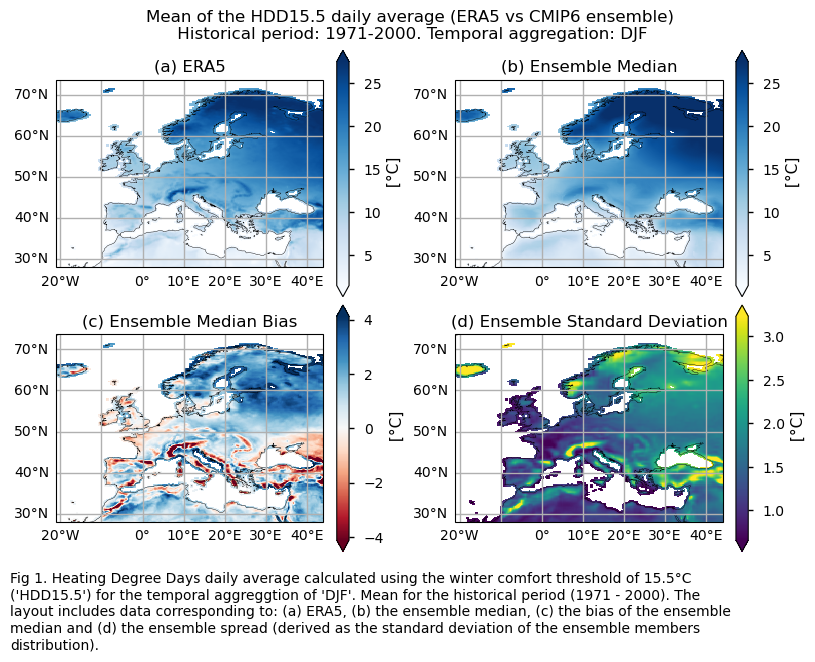

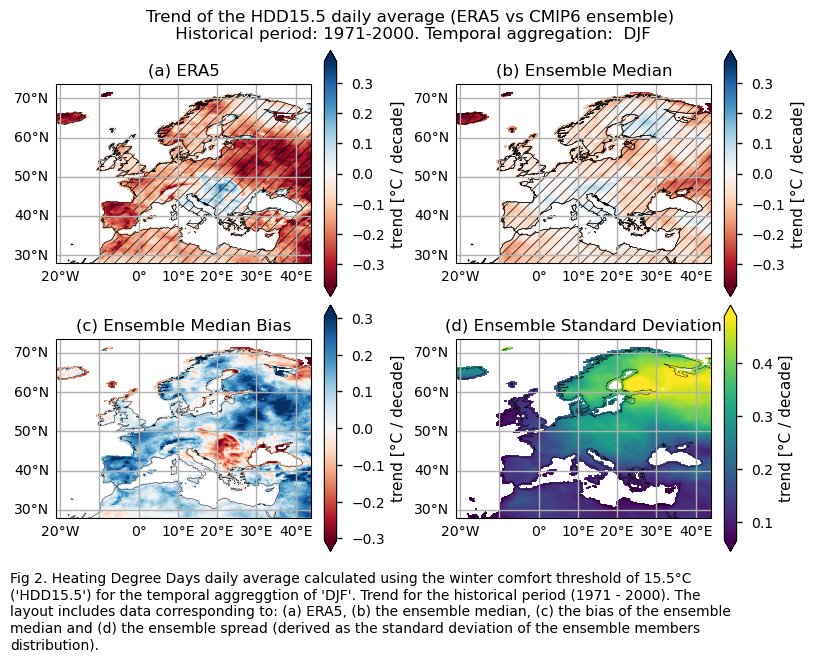

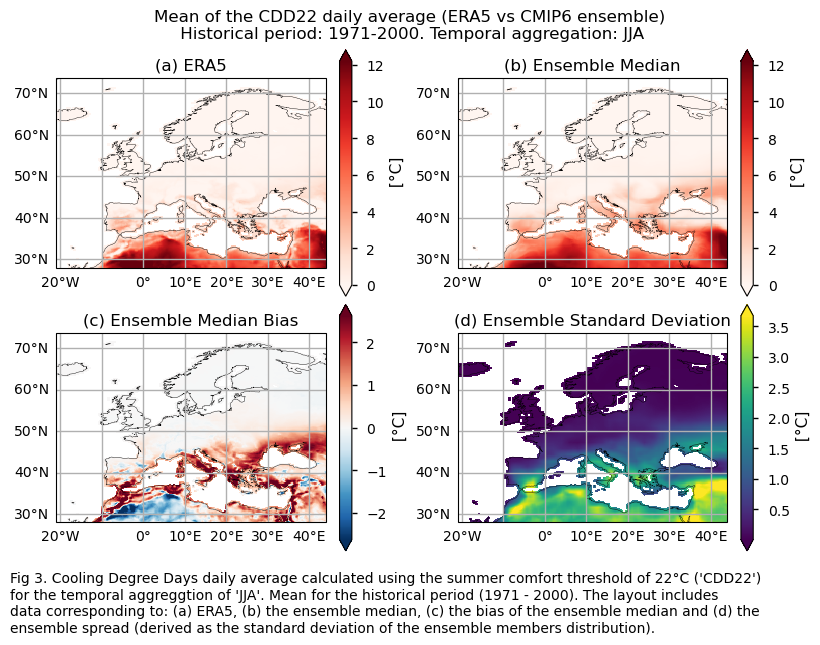

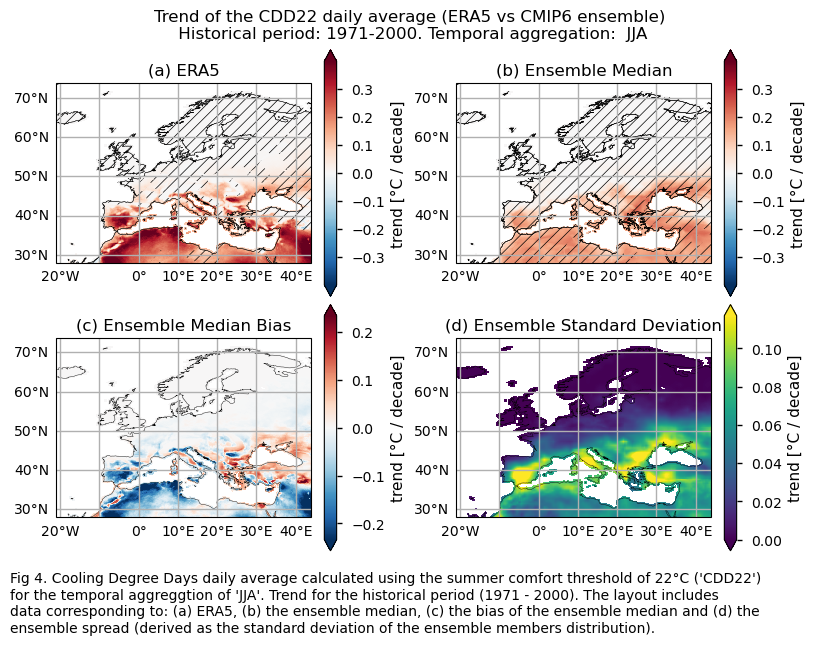

In [11]:
#Fig number counter
fig_number=1

#Common title
common_title = f"Historical period: {year_start}-{year_stop}. Temporal aggregation: "

for index in index_timeseries:
    # Index
    da = ds_interpolated[index]
    fig = plot_ensemble(
        da_models=da,
        da_era5=ds_era5[index],
        cmap=cmaps.get(index),
        cmap_bias=cmaps_bias.get(index),
    )
    fig.suptitle(f"Mean of the {index} daily average (ERA5 vs {collection_id} ensemble)\n {common_title}{index_timeseries[index]}")
    add_caption_ensemble(trend=False,exp="historical",index=index)
    plt.show()
    fig_number=fig_number+1
    print(f"\n")

    # Trend
    da_era5_trend = ds_era5["trend"].sel(index=index)
    da_era5_trend.attrs["units"] = f"{da.attrs['units']} / decade"
    da_trend = ds_interpolated["trend"].sel(index=index)
    da_trend.attrs["units"] = f"{da.attrs['units']} / decade"
    fig = plot_ensemble(
        da_models=da_trend,
        da_era5=da_era5_trend,
        p_value_era5=ds_era5["p"].sel(index=index),
        p_value_models=ds_interpolated["p"].sel(index=index),
        center=0,
        cmap=cmaps_trend.get(index),
        cmap_bias=cmaps_bias.get(index),
    )
    fig.suptitle(f"Trend of the {index} daily average (ERA5 vs {collection_id} ensemble)\n {common_title} {index_timeseries[index]}")
    add_caption_ensemble(trend=True,exp="historical",index=index)
    plt.show()
    fig_number=fig_number+1
    print(f"\n")

### 1.6.3. Plot model maps

In this section, we invoke the `plot_models()` function to visualize the mean values and trends calculated over the historical period (1971-2000) for every model individually across Europe.

Specifically, for each of the indices ('HDD15.5' and 'CDD22'), this section presents two layouts:

1. A layout including the historical mean (1971-2000) of every model.

2. A layout including the historical trend (1971-2000) of every model.


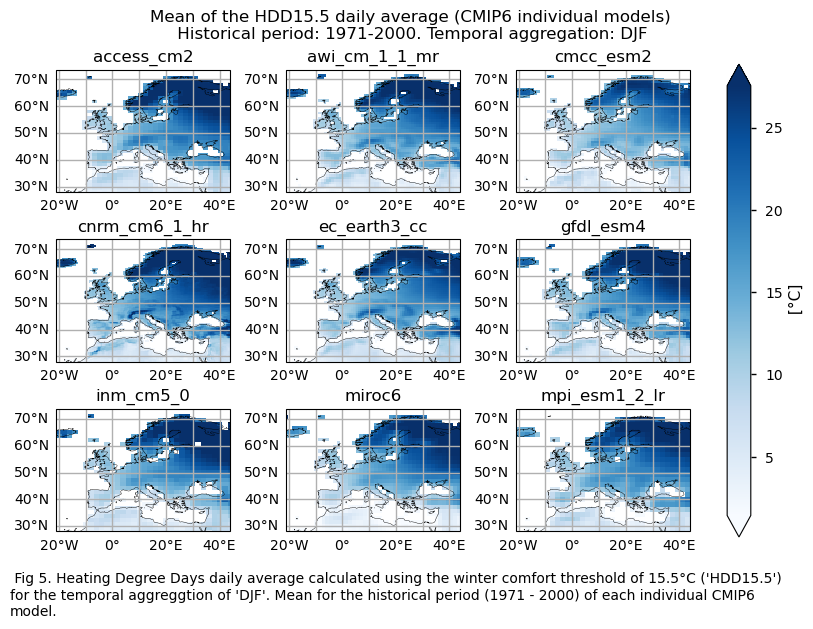

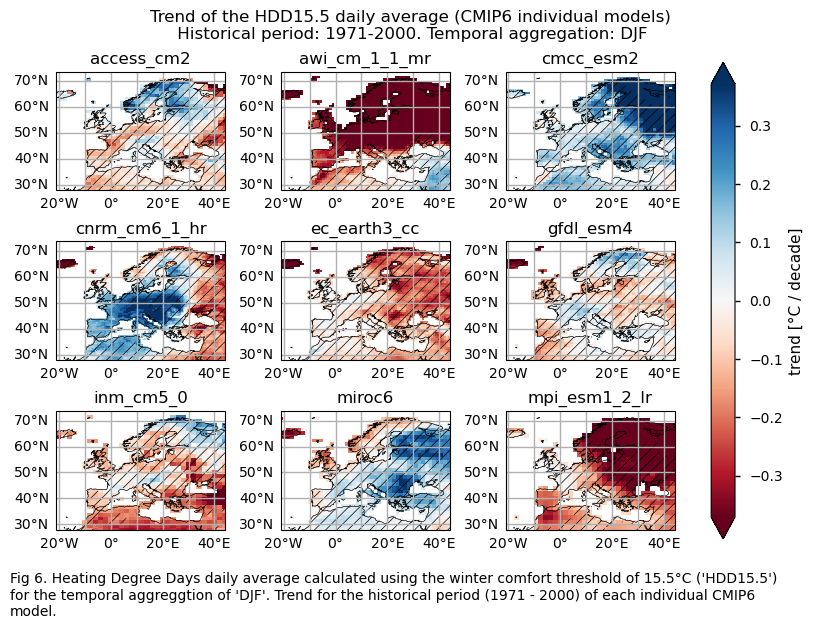

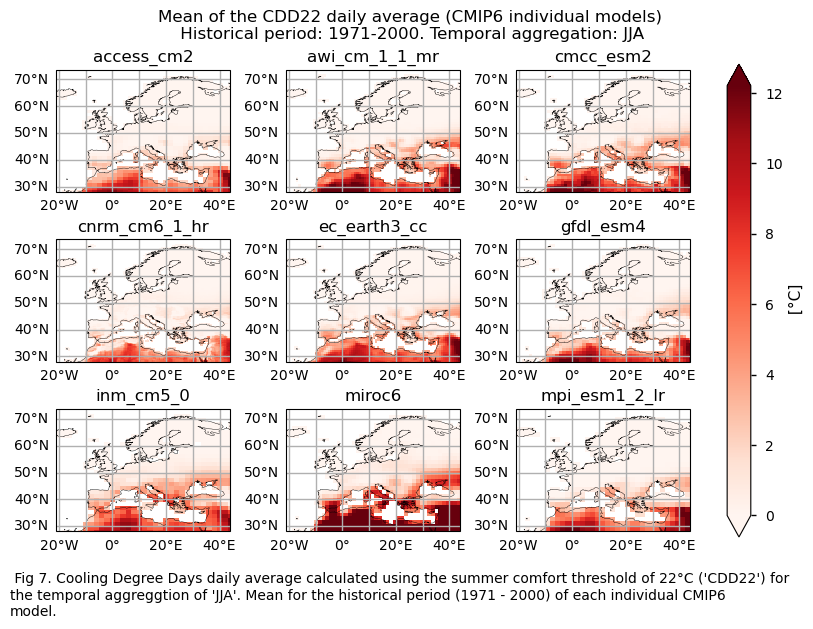

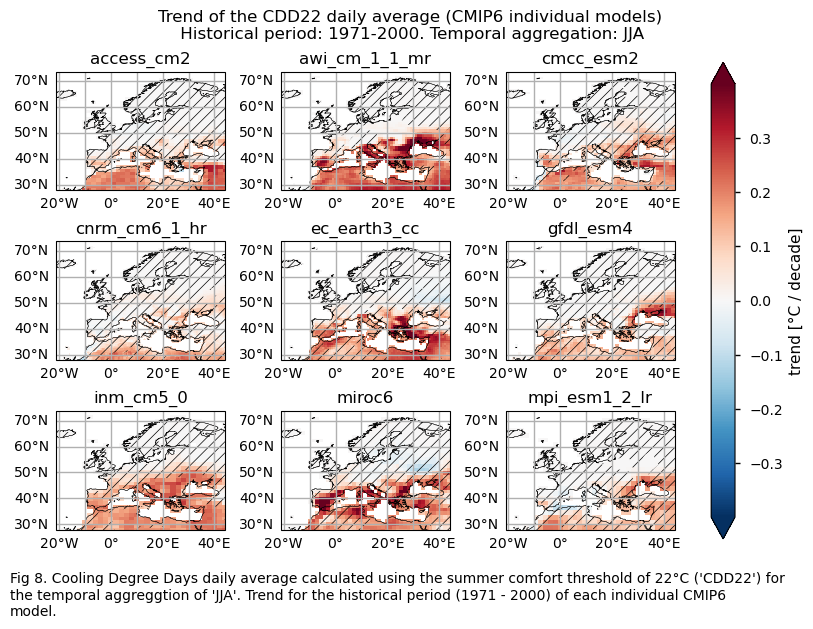

In [12]:
for index in index_timeseries:
    # Index
    da_for_kwargs = ds_era5[index]
    fig = plot_models(
        data={model: ds[index] for model, ds in model_datasets.items()},
        da_for_kwargs=da_for_kwargs,
        cmap=cmaps.get(index),
    )
    fig.suptitle(f"Mean of the {index} daily average ({collection_id} individual models)\n {common_title}{index_timeseries[index]}")
    add_caption_models(trend=False,bias=False,exp="historical",index=index)
    plt.show()
    print(f"\n")
    fig_number=fig_number+1

    # Trend
    da_for_kwargs_trends = ds_era5["trend"].sel(index=index)
    da_for_kwargs_trends.attrs["units"] = f"{da_for_kwargs.attrs['units']} / decade"
    fig = plot_models(
        data={
            model: ds["trend"].sel(index=index) for model, ds in model_datasets.items()
        },
        da_for_kwargs=da_for_kwargs_trends,
        p_values={
            model: ds["p"].sel(index=index) for model, ds in model_datasets.items()
        },
        center=0,
        cmap=cmaps_trend.get(index),
    )
    fig.suptitle(f"Trend of the {index} daily average ({collection_id} individual models)\n {common_title}{index_timeseries[index]}")
    add_caption_models(trend=True,bias=False,exp="historical",index=index)
    plt.show()
    print(f"\n")
    fig_number=fig_number+1


### 1.6.4 Plot bias maps

In this section, we invoke the `plot_models()` function to visualize the bias for the mean values and trends calculated over the historical period (1971-2000) for every model individually across Europe.

Specifically, for each of the indices ('HDD15.5' and 'CDD22'), this section presents two layouts:

1. A layout including the bias for the historical mean (1971-2000) of every model.

2. A layout including the bias for the historical trend (1971-2000) of every model.


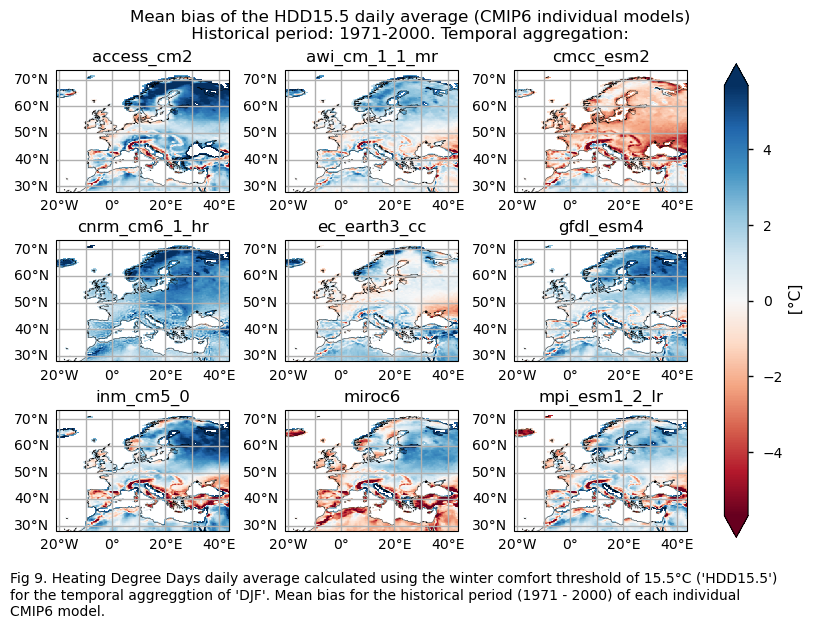

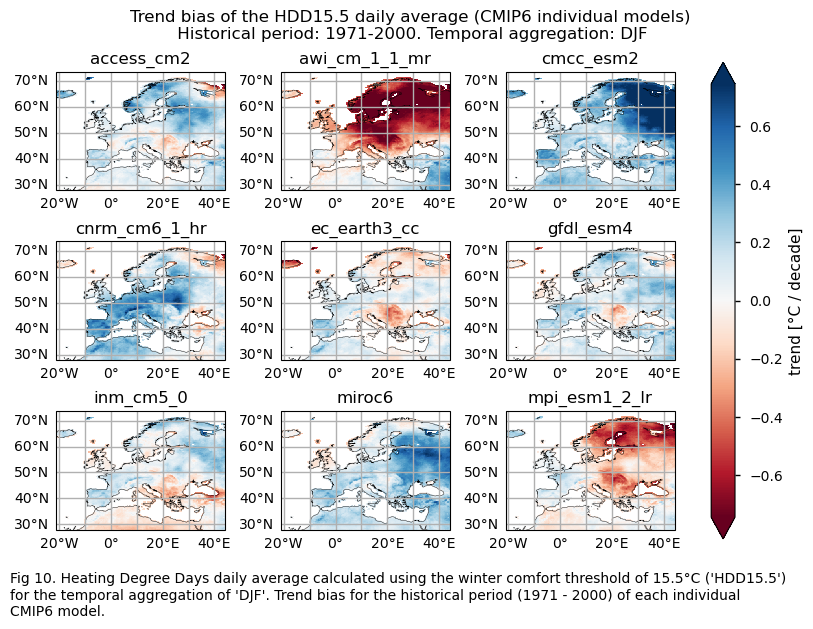

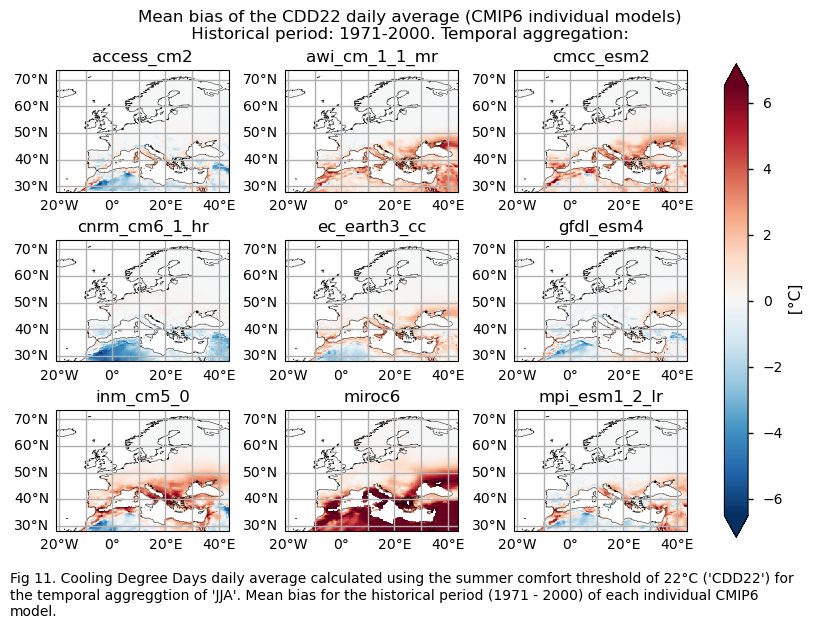

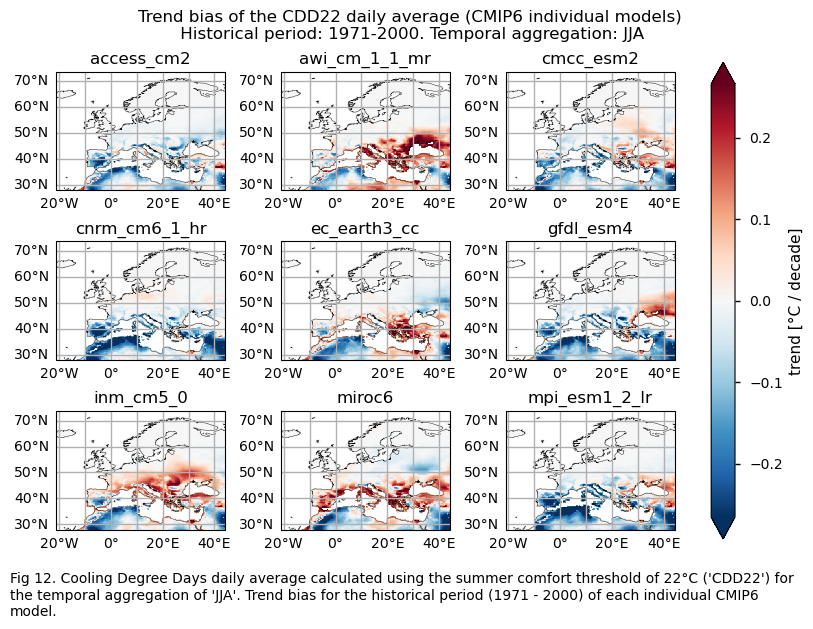

In [13]:
with xr.set_options(keep_attrs=True):
    bias = ds_interpolated - ds_era5

for index in index_timeseries:
    # Index bias
    da = bias[index]
    fig = plot_models(data=da, center=0, cmap=cmaps_bias.get(index))
    fig.suptitle(f"Mean bias of the {index} daily average ({collection_id} individual models)\n {common_title}")
    add_caption_models(trend=False,bias=True,exp="historical",index=index)
    plt.show()
    print(f"\n")
    fig_number=fig_number+1

    # Trend bias
    da_trend = bias["trend"].sel(index=index)
    da_trend.attrs["units"] = f"{da.attrs['units']} / decade"
    fig = plot_models(data=da_trend, center=0, cmap=cmaps_bias.get(index))
    fig.suptitle(f"Trend bias of the {index} daily average ({collection_id} individual models)\n {common_title}{index_timeseries[index]}")
    add_caption_models(trend=True,bias=True,exp="historical",index=index)
    plt.show()
    print(f"\n")
    fig_number=fig_number+1
    plt.show()

### 1.6.5. Boxplots of the historical trend and the trend bias

In this last section, we first compare the trends of the climate models with the reference trend from ERA5. Finally, we analyse the bias trend.  

Dots represent the spatially-averaged historical trend (or bias trend) over the selected region (change of the number of days per decade) for each model (grey), the ensemble mean (blue), and the reference product (orange). The ensemble median is shown as a green line.

The boxplot visually illustrates the distribution of trends (or bias trends) among the climate models, with the box covering the first quartile (Q1 = 25th percentile) to the third quartile (Q3 = 75th percentile), and a green line indicating the ensemble median (Q2 = 50th percentile). Whiskers extend from the edges of the box to show the full data range.

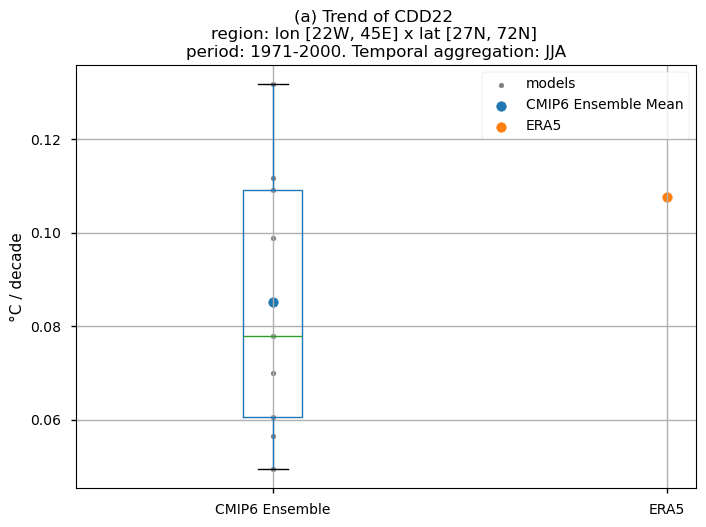

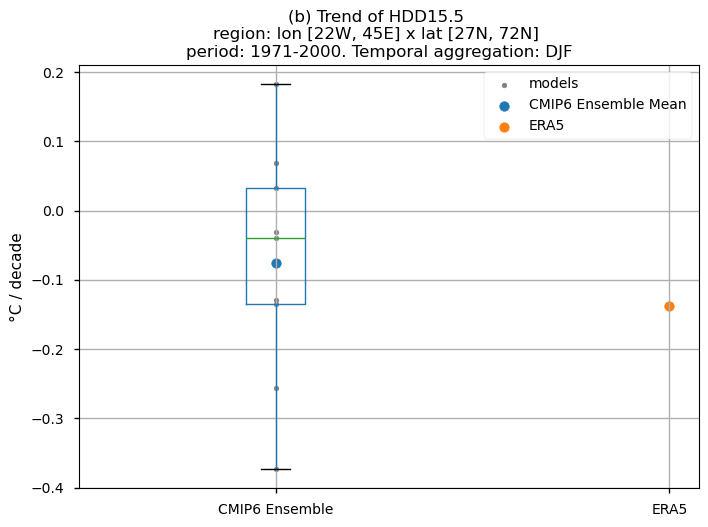

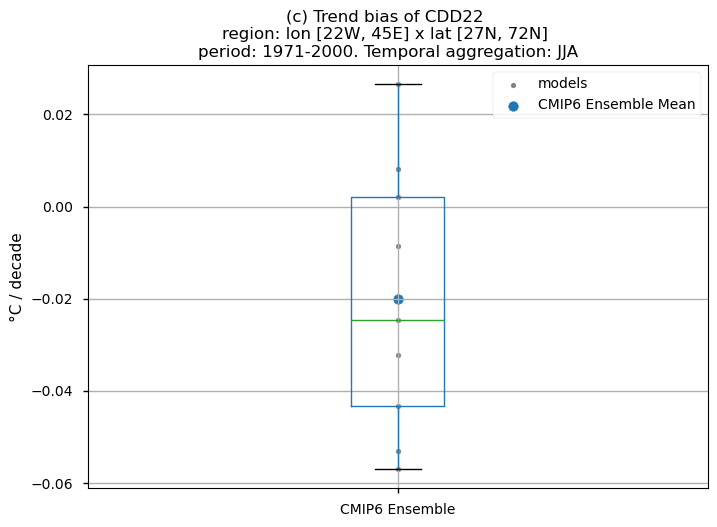

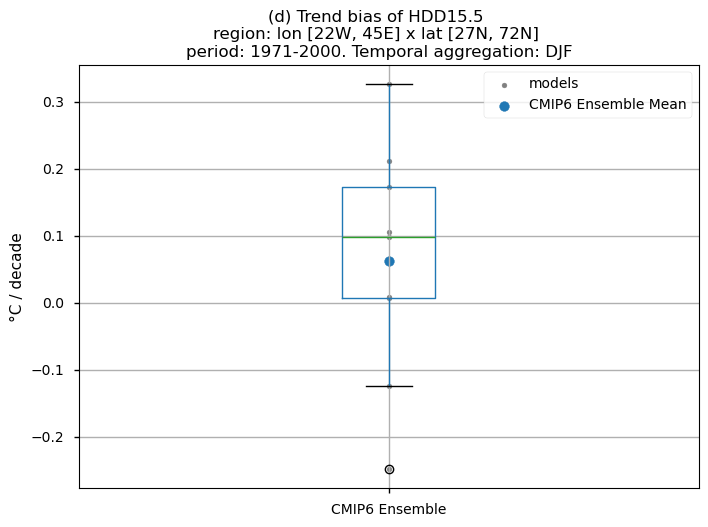

In [14]:
weights = True
mean_datasets = [
    diagnostics.spatial_weighted_mean(ds.expand_dims(model=[model]), weights=weights)
    for model, ds in model_datasets.items()
]
mean_ds = xr.concat(mean_datasets, "model")
mean_bias_ds = diagnostics.spatial_weighted_mean(bias, weights=weights)
index_str=1
for is_bias, ds in zip((False, True), (mean_ds, mean_bias_ds)):
    for index, da in ds["trend"].groupby("index"):
        df_slope = da.to_dataframe()[["trend"]]
        ax = df_slope.boxplot()
        ax.scatter(
            x=[1] * len(df_slope),
            y=df_slope,
            color="grey",
            marker=".",
            label="models",
        )

        # Ensemble mean
        ax.scatter(
            x=1,
            y=da.mean("model"),
            marker="o",
            label="CMIP6 Ensemble Mean",
        )

        # ERA5
        labels = ["CMIP6 Ensemble"]
        if not is_bias:
            da = ds_era5["trend"].sel(index=index)
            da = diagnostics.spatial_weighted_mean(da)
            ax.scatter(
                x=2,
                y=da.values,
                marker="o",
                label="ERA5",
            )
            labels.append("ERA5")

        ax.set_xticks(range(1, len(labels) + 1), labels)
        ax.set_ylabel(f"{ds[index].attrs['units']} / decade")
        plt.suptitle(
            f"({chr(ord('`')+index_str)}) Trend{' bias ' if is_bias else ' '}of {index} \n"
            f"region: lon [{-area[1]}W, {area[3]}E] x lat [{area[2]}N, {area[0]}N] \n"
            f"period: {year_start}-{year_stop}. Temporal aggregation: {index_timeseries[index]}"
        ) 
        plt.legend()
        plt.show()
        index_str=index_str+1

<br>
<br>
<br>
<br>
<div align="center">

# 2. FUTURE PERIOD NOTEBOOK

## Outline of the sub-notebook 2  

* [2.1. Abstract](#2.1.-Abstract)
* [2.2. Methods and analyses](#2.2.-Methods-and-analyses)
* [2.3. Take home messages](#2.3.-Take-home-messages)
* [2.4. Parameters, requests and functions definition](#2.4.-Parameters,-requests-and-functions-definition)
     *  [2.4.1. Import packages](#2.4.1.-Import-packages)
     *  [2.4.2. Define Parameters](#2.4.2.-Define-Parameters)
     *  [2.4.3. Define models](#2.4.3.-Define-models)
     *  [2.4.4. Define land-sea mask request](#2.4.4.-Define-land-sea-mask-request)
     *  [2.4.5. Define model requests](#2.4.5.-Define-model-requests)
     *  [2.4.6. Functions to cache](#2.4.6.-Functions-to-cache)
* [2.5. Downloading and processing](#2.5.-Downloading-and-processing)
     *  [2.5.1. Download and transform the regridding model](#2.5.1.-Download-and-transform-the-regridding-model)
     *  [2.5.2. Download and transform models](#2.5.2.-Download-and-transform-models)
     *  [2.5.3. Apply land-sea mask, change attributes and cut the region to show](#2.5.3.-Apply-land-sea-mask,-change-attributes-and-cut-the-region-to-show)
* [2.6. Plotting section](#2.6.-Plotting-section)
     *  [2.6.1. Define plotting function](#2.6.1.-Define-plotting-function)
     *  [2.6.2. Plot ensemble maps](#2.6.2.-Plot-ensemble-maps)
     *  [2.6.3. Plot model maps](#2.6.3.-Plot-model-maps)
     *  [2.6.4. Boxplots of the future trend](#2.6.4.-Boxplots-of-the-future-trend)

## 2.1. Abstract 

In this sub-notebook, data from a subset of 9 models of [CMIP6](https://confluence.ecmwf.int/display/CKB/CMIP6%3A+Global+climate+projections) Global Climate Models (GCM), as well as [ERA5](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-complete?tab=doc) reanalysis, are considered. Two energy-consumption-related indices are calculated using the [icclim](https://icclim.readthedocs.io/en/stable/) Python package: Cooling and Heating Degree Days (CDDs and HDDs respectively). The reference methodology used here is similar to the one followed by Scoccimarro et al., [2023](https://doi.org/10.1038/s43247-023-00878-3). However the thermal comfort thresholds used in this sub-notebook are slightly different. A winter comfort temperature of 15.5°C and a summer comfort temperature of 22.0°C are used here (as in the [CDS application](https://datastore.copernicus-climate.eu/documents/app-heating-cooling-degree-days/C3S_EEA_HDD_CDD_application_user_guide_v0.9.pdf)). These comfort temperatures remain constant across Europe. A higher number of Heating Degree Days (HDD) indicates that outdoor temperatures fall below the winter comfort threshold, necessitating more energy to heat buildings. Similarly, a higher number of Cooling Degree Days (CDD) indicates outdoor temperatures exceeding the summer comfort level, requiring increased energy for cooling buildings. In the presented code, the CDD calculations are always based on the JJA aggregation, with a comfort temperature of 22°C (**CDD22**), while HDD calculations focus on winter (DJF) with a comfort temperature of 15.5°C (**HDD15.5**). More specifically, to calculate CDD22, the sum of the differences between the daily mean temperature and the thermal comfort temperature of 22°C is computed. This calculation occurs only when the mean temperature is above the thermal comfort level; otherwise, the CDD22 for that day is set to 0. Similarly, to calculate HDD15.5, the sum of the differences between the thermal comfort temperature of 15.5°C and the daily mean temperature is determined. This happens only when the mean temperature is below the thermal comfort level; otherwise, the HDD15.5 for that day is set to 0. Finally, the sum is averaged with the number of days in the season to obtain a daily average value. In Spinoni et al., [2018](https://doi.org/10.1002/joc.5362), more advanced methods for calculating CDD and HDD involve considering maximum, minimum, and mean temperatures. However, to prevent overloading the sub-notebook and maintain simplicity while ensuring compatibility with the [icclim](https://icclim.readthedocs.io/en/stable/) Python package, we opted to utilize a single variable (2m mean temperature).


The indices calculations are performed over the future period from **2016 to 2099**, following the Shared Socioeconomic Pathways **SSP5-8.5**. After calculating these indices for the future period (resulting in index values per year) trends are calculated. The trends are shown for each model and for the ensemble median. Additionally, maps of the ensemble spread (derived as the standard deviation of the ensemble members' distribution) are calculated and displayed for the trends. Finally, boxplots which represent statistical distributions (PDF) built on the future trend from each considered model are shown.

Within this sub-notebook, the displayed values always represent the daily average over the respective season.

The size and location of the subdomain considered are customizable, as well as the temporal aggregation (annual or seasonal).


## 2.2. Methods and analyses

This sub-notebook performs the following analyses:

- Maps representing the spatial distribution of the **future trends** (2016-2099) of the indices 'HDD15.5' and 'CDD22' for each model individually, the ensemble median, and the ensemble spread.
- **Boxplots** which represent statistical distributions (PDF) built on the future trend from each considered model. 

## 2.3. Take home messages

- Trends calculated for the future period (2016-2099) exhibit a general decrease in Heating Degree Days (HDD15.5) across Europe for DJF, especially in the northern and central-eastern regions where winter Heating Degree Days are typically higher. For Cooling Degree Days (CDD22) trends calculated for summer in Europe, an increase can be observed, particularly in the southern half and central regions. However, no trend is observed for some northern regions and certain mountain areas, possibly due to the threshold temperature of 22°C being too high to be reached across these regions.

- The boxplots illustrate a decrease in Heating Degree Days (HDD15.5) across Europe for DJF during the future period from 2016 to 2099. The ensemble median trend reaches a daily average value near -0.27 °C per decade, which is a larger decrease than that captured by ERA5 for the historical period (around -0.15 °C per decade). The interquantile range of the ensemble ranges from -0.30 to around -0.24 °C per decade.

- The boxplot analysis reveals an increase in Cooling Degree Days (CDD22) across Europe for JJA, with an ensemble median trend value near 0.26 °C per decade and an interquantile range from 0.21 to 0.29 °C per decade. This increase is again larger than that reflected by the ERA5 calculations over the historical period (which is around 0.11°C/decade).


## 2.4. Parameters, requests and functions definition

### 2.4.1. Import packages

In [15]:
import math
import tempfile
import warnings
import textwrap
warnings.filterwarnings("ignore")

import cartopy.crs as ccrs
import icclim
import matplotlib.pyplot as plt
import xarray as xr
from c3s_eqc_automatic_quality_control import diagnostics, download, plot, utils
from xarrayMannKendall import Mann_Kendall_test

plt.style.use("seaborn-v0_8-notebook")
plt.rcParams["hatch.linewidth"] = 0.5

### 2.4.2. Define Parameters

In the "Define Parameters" section, various customizable options for the sub-notebook are specified:

- The initial and ending year used for the future projections period can be specified by changing the parameters `year_start` and `year_stop` (2016-2099 is chosen).
- `index_timeseries` is a dictionary that set the temporal aggregation for every index considered within this notebook ('HDD15.5' and 'CDD22'). In the presented code, the CDD calculations are always based on the JJA aggregation, with a comfort temperature of 22°C (CDD22), while HDD calculations focus on winter (DJF) with a comfort temperature of 15.5°C (HDD15.5).
- `collection_id` set the family of models. Only CMIP6 is implemented for this sub-notebook.
- `area` allows specifying the geographical domain of interest.
- The `interpolation_method` parameter allows selecting the interpolation method when regridding is performed over the indices.
- The `chunk` selection allows the user to define if dividing into chunks when downloading the data on their local machine. Although it does not significantly affect the analysis, it is recommended to keep the default value for optimal performance.

In [16]:
# Time period
year_start = 2016
year_stop = 2099

# Choose annual or seasonal timeseries
index_timeseries = {
    "HDD15.5": "DJF",
    "CDD22": "JJA",
}
if "annual" in index_timeseries.values():
    assert set(index_timeseries.values()) == {"annual"}

# Select the family of models 
collection_id = "CMIP6"
assert collection_id in ("CMIP6")

# Interpolation method
interpolation_method = "bilinear"

# Area to show
area = [72, -22, 27, 45]

# Chunks for download
chunks = {"year": 1}


### 2.4.3. Define models

The following climate analyses are performed considering a subset of GCMs from CMIP6. Models names are listed in the parameters below. Some variable-dependent parameters are also selected.

The selected CMIP6 models have available both experiments the historical and the SSP5-8.5. 

In [17]:
# Define models
models_cmip6 = (
    "access_cm2",
    "awi_cm_1_1_mr",
    "cmcc_esm2",
    "cnrm_cm6_1_hr",
    "ec_earth3_cc",
    "gfdl_esm4",
    "inm_cm5_0",
    "miroc6",
    "mpi_esm1_2_lr",
)
model_regrid = "gfdl_esm4"

# Colormaps
cmaps = {"HDD15.5": "Blues", "CDD22": "Reds"}
cmaps_trend = cmaps_bias = {"HDD15.5": "RdBu", "CDD22": "RdBu_r"}

#Define dictionaries to use in titles and caption
long_name = {
    "HDD15.5":"Heating Degree Days daily average calculated using the winter comfort threshold of 15.5°C" , 
    "CDD22":"Cooling Degree Days daily average calculated using the summer comfort threshold of 22°C",
}

### 2.4.4. Define land-sea mask request

Within this sub-notebook, ERA5 will be used to download the land-sea mask when plotting. In this section, we set the required parameters for the cds-api data-request of ERA5 land-sea mask.

In [18]:
request_lsm = (
    "reanalysis-era5-single-levels",
    {
        "product_type": "reanalysis",
        "format": "netcdf",
        "time": "00:00",
        "variable": "land_sea_mask",
        "year": "1940",
        "month": "01",
        "day": "01",
        "area": area,
    },
)

### 2.4.5. Define model requests

In this section we set the required parameters for the cds-api data-request.

When `Weights = True`, spatial weighting is applied for calculations requiring spatial data aggregation. This is particularly relevant for CMIP6 GCMs with regular lon-lat grids that do not consider varying surface extensions at different latitudes. 

In [19]:
request_cmip6 = {
    "format": "zip",
    "temporal_resolution": "daily",
    "experiment": "ssp5_8_5",
    "variable": "near_surface_air_temperature",
    "year": [
        str(year) for year in range(year_start - 1, year_stop + 1)
    ],  # Include D(year-1)
    "month": [f"{month:02d}" for month in range(1, 13)],
    "day": [f"{day:02d}" for day in range(1, 32)],
    "area": area,
}

model_requests = {}
for model in models_cmip6:
    model_requests[model] = (
        "projections-cmip6",
        download.split_request(request_cmip6 | {"model": model}, chunks=chunks),
    )

request_grid_out = model_requests[model_regrid]

### 2.4.6. Functions to cache

In this section, functions that will be executed in the caching phase are defined. Caching is the process of storing copies of files in a temporary storage location, so that they can be accessed more quickly. This process also checks if the user has already downloaded a file, avoiding redundant downloads.

Functions description:

- The `select_timeseries` function subsets the dataset based on the chosen `timeseries` parameter. 

- The `compute_indices` function utilizes the icclim package to calculate the energy-consumption-related indices.

- The `compute_trends` function employs the Mann-Kendall test for trend calculation.

- Finally, the `compute_indices_and_trends` function calculates the energy consumption-related indices for the corresponding temporal aggregation using the `compute_indices` function, determines the indices mean for the future period (2016-2099), obtain the trends using the `compute_trends` function, and offers an option for regridding to `model_regrid`.

In [20]:
def select_timeseries(ds, index_timeseries, year_start, year_stop):
    timeseries = set(index_timeseries.values())
    if timeseries == {"annual"}:
        return ds.sel(time=slice(str(year_start), str(year_stop)))
    assert "annual" not in timeseries
    return ds.sel(time=slice(f"{year_start-1}-12", f"{year_stop}-11"))


def compute_indices(ds, index_timeseries, tmpdir):
    labels, datasets = zip(*ds.groupby("time.year"))
    paths = [f"{tmpdir}/{label}.nc" for label in labels]
    datasets = [ds.chunk(-1) for ds in datasets]
    xr.save_mfdataset(datasets, paths)

    ds = xr.open_mfdataset(paths)
    in_files = f"{tmpdir}/rechunked.zarr"
    chunks = {dim: -1 if dim == "time" else "auto" for dim in ds.dims}
    ds.chunk(chunks).to_zarr(in_files)

    dataarrays = []
    for index_name, timeseries in index_timeseries.items():
        kwargs = {
            "in_files": in_files,
            "out_file": f"{tmpdir}/{index_name}.nc",
            "slice_mode": "year" if timeseries == "annual" else timeseries,
        }
        if index_name == "HDD15.5":
            ds_index = icclim.index(
                **kwargs,
                index_name="deficit",
                threshold=icclim.build_threshold("15.5 degC"),
            )
        elif index_name == "CDD22":
            ds_index = icclim.excess(
                **kwargs,
                threshold=icclim.build_threshold("22 degC"),
            )
        else:
            raise NotImplementedError(f"{index_name=}")

        (da,) = ds_index.drop_dims("bounds").data_vars.values()
        num_days = {"DJF": 90, "MAM": 92, "JJA": 92, "SON": 91}
        with xr.set_options(keep_attrs=True):
            da /= (
                num_days[timeseries]
                if timeseries != "annual"
                else sum(num_days.values())
            )
        da.attrs["units"] = da.attrs["units"].replace(" d", "")
        dataarrays.append(da.rename(index_name))
    return xr.merge(dataarrays)


def compute_trends(ds):
    datasets = []
    (lat,) = set(ds.dims) & set(ds.cf.axes["Y"])
    (lon,) = set(ds.dims) & set(ds.cf.axes["X"])
    coords_name = {
        "time": "time",
        "y": lat,
        "x": lon,
    }
    for index, da in ds.data_vars.items():
        ds = Mann_Kendall_test(
            da - da.mean("time"),
            alpha=0.05,
            method="theilslopes",
            coords_name=coords_name,
        ).compute()
        ds = ds.rename({k: v for k, v in coords_name.items() if k in ds.dims})
        ds = ds.assign_coords({dim: da[dim] for dim in ds.dims})
        datasets.append(ds.expand_dims(index=[index]))
    ds = xr.concat(datasets, "index")
    return ds


def add_bounds(ds):
    for coord in {"latitude", "longitude"} - set(ds.cf.bounds):
        ds = ds.cf.add_bounds(coord)
    return ds


def get_grid_out(request_grid_out, method):
    ds_regrid = download.download_and_transform(*request_grid_out)
    coords = ["latitude", "longitude"]
    if method == "conservative":
        ds_regrid = add_bounds(ds_regrid)
        for coord in list(coords):
            coords.extend(ds_regrid.cf.bounds[coord])
    grid_out = ds_regrid[coords]
    coords_to_drop = set(grid_out.coords) - set(coords) - set(grid_out.dims)
    grid_out = ds_regrid[coords].reset_coords(coords_to_drop, drop=True)
    grid_out.attrs = {}
    return grid_out


def compute_indices_and_trends(
    ds,
    index_timeseries,
    year_start,
    year_stop,
    resample_reduction=None,
    request_grid_out=None,
    **regrid_kwargs,
):
    assert (request_grid_out and regrid_kwargs) or not (
        request_grid_out or regrid_kwargs
    )
    ds = ds.drop_vars([var for var, da in ds.data_vars.items() if len(da.dims) != 3])
    ds = ds[list(ds.data_vars)]

    # Original bounds for conservative interpolation
    if regrid_kwargs.get("method") == "conservative":
        ds = add_bounds(ds)
        bounds = [
            ds.cf.get_bounds(coord).reset_coords(drop=True)
            for coord in ("latitude", "longitude")
        ]
    else:
        bounds = []

    ds = select_timeseries(ds, index_timeseries, year_start, year_stop)
    if resample_reduction:
        resampled = ds.resample(time="1D")
        ds = getattr(resampled, resample_reduction)(keep_attrs=True)
        if resample_reduction == "sum":
            for da in ds.data_vars.values():
                da.attrs["units"] = f"{da.attrs['units']} / day"
    with tempfile.TemporaryDirectory() as tmpdir:
        ds_indices = compute_indices(ds, index_timeseries, tmpdir).compute()
        ds_trends = compute_trends(ds_indices)
        ds = ds_indices.mean("time", keep_attrs=True)
        ds = ds.merge(ds_trends)
        if request_grid_out:
            ds = diagnostics.regrid(
                ds.merge({da.name: da for da in bounds}),
                grid_out=get_grid_out(request_grid_out, regrid_kwargs["method"]),
                **regrid_kwargs,
            )
        return ds

## 2.5. Downloading and processing

### 2.5.1. Download and transform the regridding model

In this section, the `download.download_and_transform` function from the 'c3s_eqc_automatic_quality_control' package is employed to download daily data from the selected CMIP6 regridding model, compute the energy-consumption-related indices for the selected temporal aggregation ("DJF" for HDD and "JJA" for CDD), calculate the mean and trend over the future projections period (2016-2099), and cache the result (to avoid redundant downloads and processing). 

In [21]:
transform_func_kwargs = {
    "index_timeseries": dict(sorted(index_timeseries.items())),
    "year_start": year_start,
    "year_stop": year_stop,
}
model_kwargs = {
    "chunks": chunks,
    "transform_chunks": False,
    "transform_func": compute_indices_and_trends,
}
ds_regrid = download.download_and_transform(
    *request_grid_out,
    **model_kwargs,
    transform_func_kwargs=transform_func_kwargs,
)

### 2.5.2. Download and transform models

In this section, the `download.download_and_transform` function from the 'c3s_eqc_automatic_quality_control' package is employed to download daily data from the CMIP6 models, compute the energy-consumption-related indices for the selected temporal aggregation ("DJF" for HDD and "JJA" for CDD), calculate the mean and trend over the future period (2016-2099), interpolate to the regridding model's grid (only for the cases in which it is specified, in the other cases, the original model's grid is mantained), and cache the result (to avoid redundant downloads and processing). 

In [22]:
interpolated_datasets = []
model_datasets = {}
for model, requests in model_requests.items():
    print(f"{model=}")
    # Original model
    ds = download.download_and_transform(
        *requests,
        **model_kwargs,
        transform_func_kwargs=transform_func_kwargs,
    )
    model_datasets[model] = ds

    # Interpolated model
    ds = download.download_and_transform(
        *requests,
        **model_kwargs,
        transform_func_kwargs=transform_func_kwargs
        | {
            "request_grid_out": request_lsm,
            "method": interpolation_method,
            "skipna": True,
        },
    )
    interpolated_datasets.append(ds.expand_dims(model=[model]))

ds_interpolated = xr.concat(interpolated_datasets, "model")

model='access_cm2'
model='awi_cm_1_1_mr'
model='cmcc_esm2'
model='cnrm_cm6_1_hr'
model='ec_earth3_cc'
model='gfdl_esm4'
model='inm_cm5_0'
model='miroc6'
model='mpi_esm1_2_lr'


### 2.5.3. Apply land-sea mask, change attributes and cut the region to show

This section performs the following tasks:

1. Cut the region of interest.
2. Downloads the sea mask for ERA5.
3. Regrids ERA5's mask to the `model_regrid` grid and applies it to the regridded data
4. Regrids the ERA5 land-sea mask to the model's original grid and applies it to them.
5. Change some variable attributes for plotting purposes.

**Note:** `ds_interpolated` contains data from the models regridded to the regridding model's grid. `model_datasets` contain the same data but in the original grid of each model.

In [23]:
lsm = download.download_and_transform(*request_lsm)["lsm"].squeeze(drop=True)

# Cutout
regionalise_kwargs = {
    "lon_slice": slice(area[1], area[3]),
    "lat_slice": slice(area[0], area[2]),
}
lsm = utils.regionalise(lsm, **regionalise_kwargs)
ds_interpolated = utils.regionalise(ds_interpolated, **regionalise_kwargs)
model_datasets = {
    model: utils.regionalise(ds, **regionalise_kwargs)
    for model, ds in model_datasets.items()
}

# Mask
ds_interpolated = ds_interpolated.where(
    diagnostics.regrid(lsm, ds_interpolated, method="bilinear")
)
model_datasets = {
    model: ds.where(diagnostics.regrid(lsm, ds, method="bilinear"))
    for model, ds in model_datasets.items()
}

# Edit attributes
for ds in (ds_interpolated, *model_datasets.values()):
    ds["trend"] *= 10
    ds["trend"].attrs = {"long_name": "trend"}
    for index in index_timeseries:
        ds[index].attrs = {"long_name": "", "units": "°C" if ds[index].attrs["units"]=="K"
                                else (ds[index].attrs["units"])}

## 2.6. Plotting section

### 2.6.1. Define plotting function

The functions presented here are used to plot the trends calculated over the future period (2016-2099) for each of the indices ('HDD15.5' and 'CDD22').

For a selected index, two layout types will be displayed, depending on the chosen function:

1. Layout including the ensemble median and the ensemble spread for the trend: `plot_ensemble()` is used.
2. Layout including every model trend: `plot_models()` is employed.

`trend==True` allows displaying trend values over the future period, while `trend==False` show mean values. In this sub-notebook, which focuses on the future period, only trend values will be shown, and, consequently, `trend==True`. When the `trend` argument is set to True, regions with no significance are hatched. For individual models, a grid point is considered to have a statistically significant trend when the p-value is lower than 0.05 (in such cases, no hatching is shown). However, for determining trend significance for the ensemble median, reliance is placed on agreement categories, following the advanced approach proposed in AR6 [IPCC](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Atlas.pdf) on pages 1945-1950. The `hatch_p_value_ensemble()` function is used to distinguish between three possible cases:

1. If more than 66% of the members are statistically significant (p-value < 0.05) and more than 80% of the members share the same sign, we consider the ensemble median trend to be statistically significant, and there is agreement on the sign. To represent this, no hatching is used.
2. If less than 66% of the members are statistically significant, regardless of agreement on the sign of the trend, hatching is applied (indicating that the ensemble median trend is not statistically significant).
3. If more than 66% of the members are statistically significant but less than 80% of the members share the same sign, we consider the ensemble median trend to be statistically significant, but there is no agreement on the sign of the trend. This is represented using crosses.


In [24]:
#Define function to plot the caption of the figures (for the ensmble case)
def add_caption_ensemble(trend,exp,index):
    #Add caption to the figure
    match trend:
        case True:
            caption_text = (
                f"Fig {fig_number}. {long_name[index]} ('{index}') for "
                f"the temporal aggregation of '{index_timeseries[index]}'. Trend for "
                f"the {exp} period ({year_start}-{year_stop}). "
                f"The layout includes data corresponding to: (a) the ensemble median and (b) the ensemble spread "
                f"(derived as the standard deviation of the ensemble members distribution)."
            )
        case False:
            caption_text = (
                f"Fig {fig_number}. {long_name[index]} ('{index}') for "
                f"the temporal aggregation of '{index_timeseries[index]}'. Trend for "
                f"the {exp} period ({year_start}-{year_stop}). "
                f"The layout includes data corresponding to: (a) the ensemble median and (b) the ensemble spread "
                f"(derived as the standard deviation of the ensemble members distribution)."
            )
          
            
    wrapped_lines = textwrap.wrap(caption_text, width=105)
    # Add each line to the figure
    for i, line in enumerate(wrapped_lines):
        fig.text(0, -0.05  - i * 0.03, line, ha='left', fontsize=10)
    #end captioning


#Define function to plot the caption of the figures (for the individual models case)
def add_caption_models(trend,exp,index):
    #Add caption to the figure
    match trend:
        case True:
            caption_text = (
                f"Fig {fig_number}. {long_name[index]} ('{index}') for "
                f"the temporal aggregation of '{index_timeseries[index]}'. Trend for the {exp} "
                f"period ({year_start}-{year_stop}) of each individual "
                f"{collection_id} model. " 
            )
        case False:
            caption_text = (
                f"Fig {fig_number}. {long_name[index]} ('{index}') for "
                f"the temporal aggregation of '{index_timeseries[index]}'. Trend for the {exp} "
                f"period ({year_start}-{year_stop}) of each individual "
                f"{collection_id} model. " 
            )
    wrapped_lines = textwrap.wrap(caption_text, width=110)
    # Add each line to the figure
    for i, line in enumerate(wrapped_lines):
        fig.text(0, -0.05  - i * 0.03, line, ha='left', fontsize=10)

def hatch_p_value(da, ax, **kwargs):
    default_kwargs = {
        "plot_func": "contourf",
        "show_stats": False,
        "cmap": "none",
        "add_colorbar": False,
        "levels": [0, 0.05, 1],
        "hatches": ["", "/" * 3],
    }
    kwargs = default_kwargs | kwargs

    title = ax.get_title()
    plot_obj = plot.projected_map(da, ax=ax, **kwargs)
    ax.set_title(title)
    return plot_obj


def hatch_p_value_ensemble(trend, p_value, ax):
    n_models = trend.sizes["model"]
    robust_ratio = (p_value <= 0.05).sum("model") / n_models
    robust_ratio = robust_ratio.where(p_value.notnull().any("model"))
    signs = xr.concat([(trend > 0).sum("model"), (trend < 0).sum("model")], "sign")
    sign_ratio = signs.max("sign") / n_models
    robust_threshold = 0.66
    sign_ratio = sign_ratio.where(robust_ratio > robust_threshold)
    for da, threshold, character in zip(
        [robust_ratio, sign_ratio], [robust_threshold, 0.8], ["/", "\\"]
    ):
        hatch_p_value(da, ax=ax, levels=[0, threshold, 1], hatches=[character * 3, ""])


def set_extent(da, axs, area):
    extent = [area[i] for i in (1, 3, 2, 0)]
    for i, coord in enumerate(extent):
        extent[i] += -1 if i % 2 else +1
    for ax in axs:
        ax.set_extent(extent)


def plot_models(
    data,
    da_for_kwargs=None,
    p_values=None,
    col_wrap=3,
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=None,
    layout="constrained",
    area=area,
    **kwargs,
):
    if isinstance(data, dict):
        assert da_for_kwargs is not None
        model_dataarrays = data
    else:
        da_for_kwargs = da_for_kwargs or data
        model_dataarrays = dict(data.groupby("model"))

    if p_values is not None:
        model_p_dataarrays = (
            p_values if isinstance(p_values, dict) else dict(p_values.groupby("model"))
        )
    else:
        model_p_dataarrays = None

    # Get kwargs
    default_kwargs = {"robust": True, "extend": "both"}
    kwargs = default_kwargs | kwargs
    kwargs = xr.plot.utils._determine_cmap_params(da_for_kwargs.values, **kwargs)

    fig, axs = plt.subplots(
        *(col_wrap, math.ceil(len(model_dataarrays) / col_wrap)),
        subplot_kw=subplot_kw,
        figsize=figsize,
        layout=layout,
    )
    axs = axs.flatten()
    for (model, da), ax in zip(model_dataarrays.items(), axs):
        pcm = plot.projected_map(
            da, ax=ax, show_stats=False, add_colorbar=False, **kwargs
        )
        ax.set_title(model)
        if model_p_dataarrays is not None:
            hatch_p_value(model_p_dataarrays[model], ax)
    set_extent(da_for_kwargs, axs, area)
    fig.colorbar(
        pcm,
        ax=axs.flatten(),
        extend=kwargs["extend"],
        location="right",
        label=f"{da_for_kwargs.attrs.get('long_name', '')} [{da_for_kwargs.attrs.get('units', '')}]",
    )
    return fig


def plot_ensemble(
    da_models,
    da_era5=None,
    p_value_era5=None,
    p_value_models=None,
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=None,
    layout="constrained",
    cbar_kwargs=None,
    area=area,
    cmap_bias=None,
    cmap_std=None,
    **kwargs,
):
    # Get kwargs
    default_kwargs = {"robust": True, "extend": "both"}
    kwargs = default_kwargs | kwargs
    kwargs = xr.plot.utils._determine_cmap_params(
        da_models.values if da_era5 is None else da_era5.values, **kwargs
    )
    if da_era5 is None and cbar_kwargs is None:
        cbar_kwargs = {"orientation": "horizontal"}

    # Figure
    fig, axs = plt.subplots(
        *(1 if da_era5 is None else 2, 2),
        subplot_kw=subplot_kw,
        figsize=figsize,
        layout=layout,
    )
    axs = axs.flatten()
    axs_iter = iter(axs)

    # ERA5
    if da_era5 is not None:
        ax = next(axs_iter)
        plot.projected_map(
            da_era5, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **kwargs
        )
        if p_value_era5 is not None:
            hatch_p_value(p_value_era5, ax=ax)
        ax.set_title("(a) ERA5")

    # Median
    ax = next(axs_iter)
    median = da_models.median("model", keep_attrs=True)
    plot.projected_map(
        median, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **kwargs
    )
    if p_value_models is not None:
        hatch_p_value_ensemble(trend=da_models, p_value=p_value_models, ax=ax)
    ax.set_title("(b) Ensemble Median" if da_era5 is not None else "(a) Ensemble Median")

    # Bias
    if da_era5 is not None:
        ax = next(axs_iter)
        with xr.set_options(keep_attrs=True):
            bias = median - da_era5
        plot.projected_map(
            bias,
            ax=ax,
            show_stats=False,
            center=0,
            cbar_kwargs=cbar_kwargs,
            **(default_kwargs | {"cmap": cmap_bias}),
        )
        ax.set_title("(c) Ensemble Median Bias")

    # Std
    ax = next(axs_iter)
    std = da_models.std("model", keep_attrs=True)
    plot.projected_map(
        std,
        ax=ax,
        show_stats=False,
        cbar_kwargs=cbar_kwargs,
        **(default_kwargs | {"cmap": cmap_std}),
    )
    ax.set_title("(d) Ensemble Standard Deviation" if da_era5 is not None else "(b) Ensemble Standard Deviation")

    set_extent(da_models, axs, area)
    return fig

<a id='INITIAL NOTE'></a>
<div class="alert alert-block alert-warning">  
<b>COLORBAR NOTE</b>:<br> 
The colorbar chosen to represent trends for the HDD15.5 index spans from red to blue. In this color scheme, negative trend values (shown in red) indicate a decrease in Heating Degree Days over time. Conversely, blueish colors indicate an increase in Heating Degree Days over time. This selection is based on the rationale that more Heating Degree Days are associated with colder conditions, typically represented by blueish colors, while fewer Heating Degree Days indicate warmer conditions, depicted by reddish colors.

### 2.6.2. Plot ensemble maps

In this section, we invoke the `plot_ensemble()` function to visualize the trend calculated over the future period (2016-2099) for the model ensemble across Europe.

Specifically, for each of the indices ('HDD15.5' and 'CDD22'), this section presents a single layout including trend values of the future period (2016-2099) for: (a) the ensemble median and (b) the ensemble spread (derived as the standard deviation of the ensemble members' distribution).

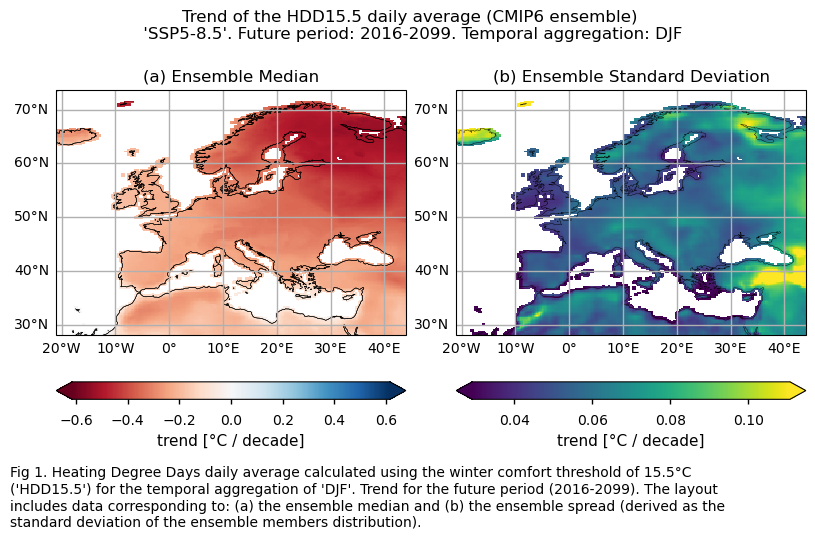

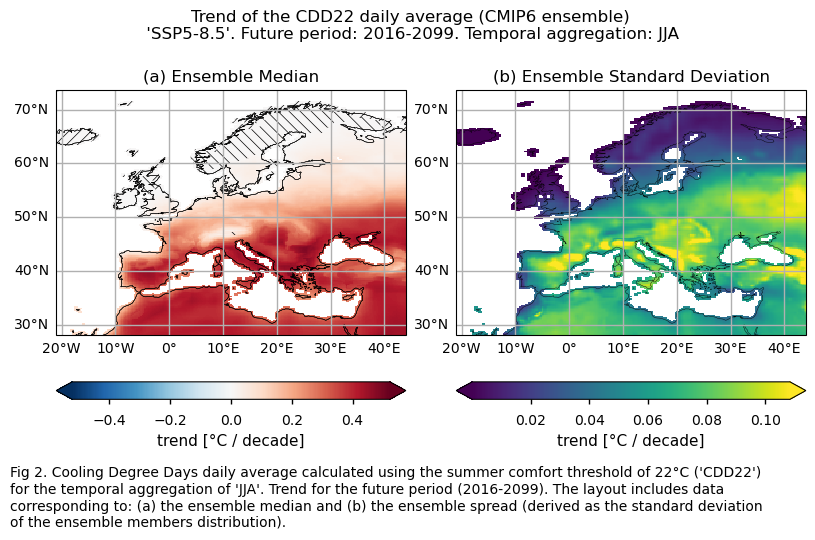

In [25]:
#Fig number counter
fig_number=1

#Common title
common_title = f"'SSP5-8.5'. Future period: {year_start}-{year_stop}. Temporal aggregation:"

for index in index_timeseries:
    # Trend
    da = ds_interpolated[index]
    da_trend = ds_interpolated["trend"].sel(index=index)
    da_trend.attrs["units"] = f"{da.attrs['units']} / decade"
    fig = plot_ensemble(
        da_models=da_trend,
        p_value_models=ds_interpolated["p"].sel(index=index),
        center=0,
        cmap=cmaps_trend.get(index),
        cmap_bias=cmaps_bias.get(index),
    )
    fig.suptitle(f"Trend of the {index} daily average ({collection_id} ensemble)\n {common_title} {index_timeseries[index]}",y=0.8)
    add_caption_ensemble(trend=True,exp="future",index=index)
    plt.show()
    fig_number=fig_number+1
    print(f"\n")



### 2.6.3. Plot model maps

In this section, we invoke the `plot_models()` function to visualize the trend calculated over the future period (2016-2099) for every model individually across Europe.

Specifically, for each of the indices ('HDD15.5' and 'CDD22'), this section presents a single layout including the trend for the future period (2016-2099) of every model.

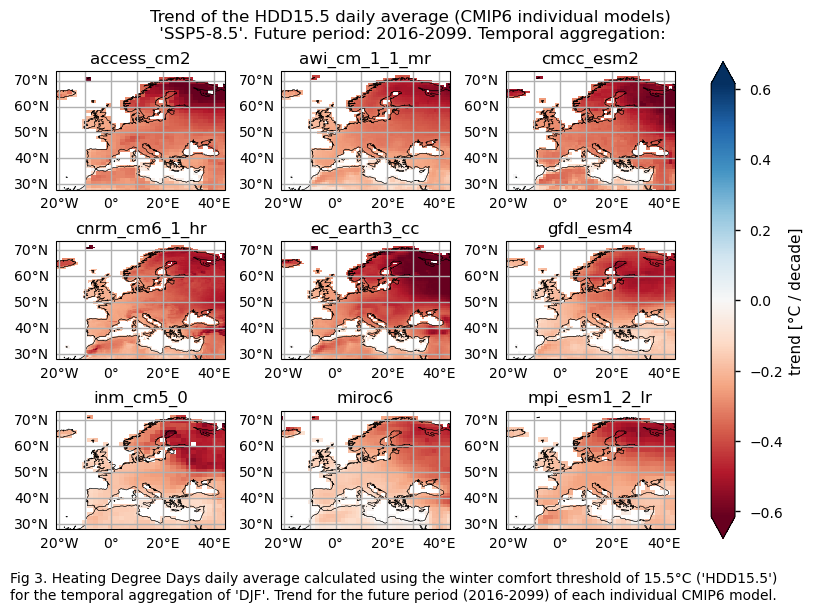

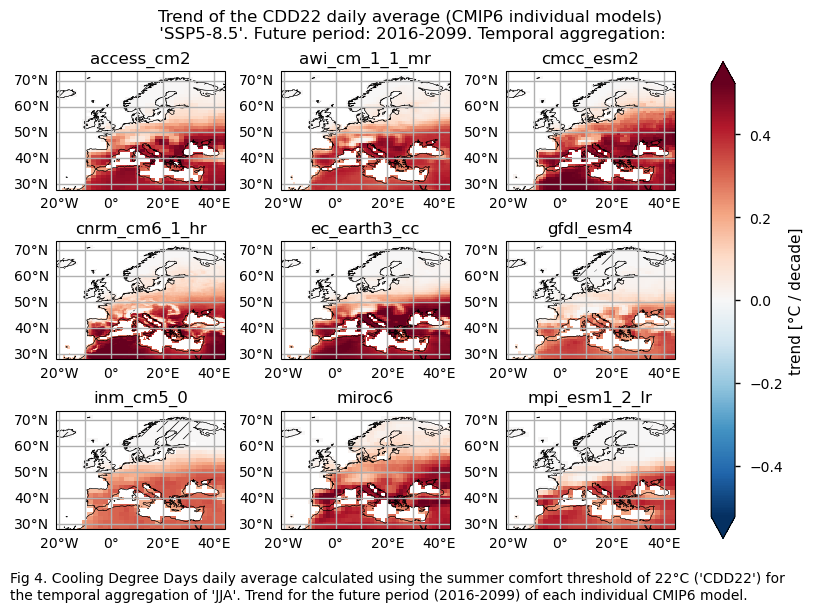

In [26]:
for index in index_timeseries:
    #da_for_kwargs = ds_interpolated[index]
    # Trend
    da_for_kwargs_trends = ds_interpolated["trend"].sel(index=index)
    da_for_kwargs_trends.attrs["units"] = f"{da_for_kwargs.attrs['units']} / decade"
    fig = plot_models(
        data={
            model: ds["trend"].sel(index=index) for model, ds in model_datasets.items()
        },
        da_for_kwargs=da_for_kwargs_trends,
        p_values={
            model: ds["p"].sel(index=index) for model, ds in model_datasets.items()
        },
        center=0,
        cmap=cmaps_trend.get(index),
    )
    fig.suptitle(f"Trend of the {index} daily average ({collection_id} individual models)\n {common_title}")
    add_caption_models(trend=True,exp="future",index=index)
    plt.show()
    print(f"\n")
    fig_number=fig_number+1

    

### 2.6.4. Boxplots of the future trend

Finally, we present boxplots representing the ensemble distribution of each climate model trend calculated over the future period (2016-2099) across Europe.

Dots represent the spatially-averaged future trend over the selected region (change of the number of days per decade) for each model (grey) and the ensemble mean (blue). The ensemble median is shown as a green line.

The boxplot visually illustrates the distribution of trends (or bias trends) among the climate models, with the box covering the first quartile (Q1 = 25th percentile) to the third quartile (Q3 = 75th percentile), and a green line indicating the ensemble median (Q2 = 50th percentile). Whiskers extend from the edges of the box to show the full data range.

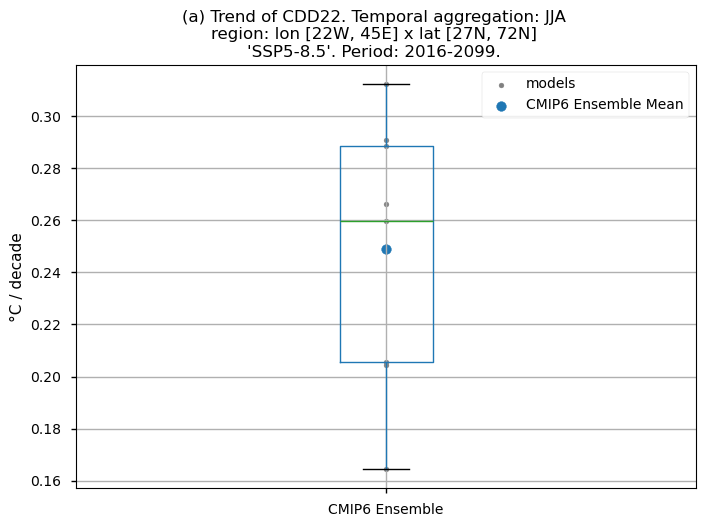

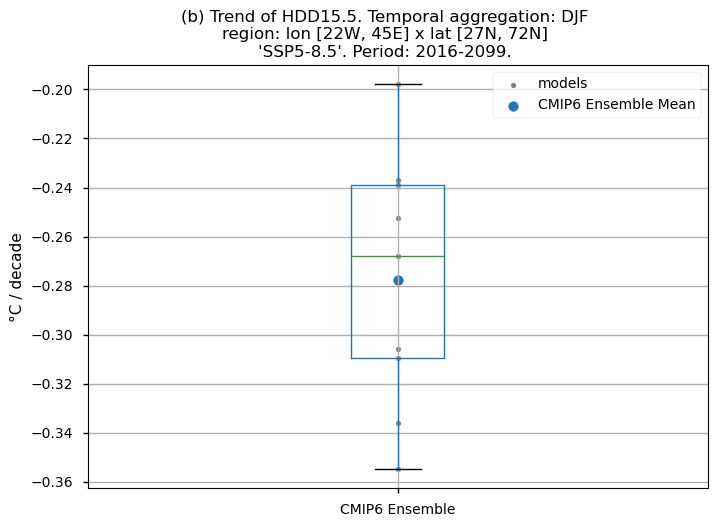

In [27]:
weights = collection_id == "CMIP6"
mean_datasets = [
    diagnostics.spatial_weighted_mean(ds.expand_dims(model=[model]), weights=weights)
    for model, ds in model_datasets.items()
]
mean_ds = xr.concat(mean_datasets, "model")
index_str=1
for index, da in mean_ds["trend"].groupby("index"):
    units = "°C / decade"  
    df_slope = da.to_dataframe()[["trend"]]
    ax = df_slope.boxplot()
    ax.scatter(
        x=[1] * len(df_slope),
        y=df_slope,
        color="grey",
        marker=".",
        label="models",
    )

    # Ensemble mean
    ax.scatter(
        x=1,
        y=da.mean("model"),
        marker="o",
        label=f"{collection_id} Ensemble Mean",
    )

    labels = [f"{collection_id} Ensemble"]
    ax.set_xticks(range(1, len(labels) + 1), labels)
    ax.set_ylabel(units)
    plt.suptitle(
            f"({chr(ord('`')+index_str)}) Trend of {index}. Temporal aggregation: {index_timeseries[index]} \n"
            f"region: lon [{-area[1]}W, {area[3]}E] x lat [{area[2]}N, {area[0]}N] \n"
            f"'SSP5-8.5'. Period: {year_start}-{year_stop}. "
        )  
    plt.legend()
    plt.show()
    index_str=index_str+1

**Fig. 5:** Boxplots illustrating the future trends of the ensemble distribution for: (a) the 'CDD22' index and (b) the 'HDD15.5' index. The distribution is created by considering spatially averaged trends across Europe. The ensemble mean and the ensemble median trends are both included. Outliers in the distribution are denoted by a grey circle with a black contour.

<br>
<br>
<br>
<br>
<div align="center">

# 3. GLOBAL WARMING LEVELS NOTEBOOK

## Outline of the sub-notebook 3  

* [3.1. Abstract](#3.1.-Abstract)
* [3.2. Methods and Analyses](#3.2.-Methods-and-Analyses)
* [3.3. Take home messages](#3.3.-Take-home-messages)
* [3.4. Parameters, requests and functions definition](#3.4.-Parameters,-requests-and-functions-definition)
     *  [3.4.1. Import packages](#3.4.1.-Import-packages)
     *  [3.4.2. Define Parameters](#3.4.2.-Define-Parameters)
     *  [3.4.3. Define models](#3.4.3.-Define-models)
     *  [3.4.4. Define land-sea mask request](#3.4.4.-Define-land-sea-mask-request)
     *  [3.4.5. Define model requests](#3.4.5.-Define-model-requests)
     *  [3.4.6. Functions to cache](#3.4.6.-Functions-to-cache)
* [3.5. Downloading and processing](#3.5.-Downloading-and-processing)
     *  [3.5.1. Download and transform the regridding model](#3.5.1.-Download-and-transform-the-regridding-model)
     *  [3.5.2. Download and transform models](#3.5.2.-Download-and-transform-models)
     *  [3.5.3. Apply land-sea mask, change attributes and cut the region to show](#3.5.3.-Apply-land-sea-mask,-change-attributes-and-cut-the-region-to-show)
* [3.6. Plotting section](#3.6.-Plotting-section)
     *  [3.6.1. Define plotting function](#3.6.1.-Define-plotting-function)
     *  [3.6.2. Plot ensemble maps](#3.6.2.-Plot-ensemble-maps)
     *  [3.6.3. Plot model maps](#3.6.3.-Plot-model-maps)
     *  [3.6.4. Boxplots of the climate change signal](#3.6.4.-Boxplots-of-the-climate-change-signal)

## 3.1. Abstract 

In this sub-notebook, data from a subset of 9 models of [CMIP6](https://confluence.ecmwf.int/display/CKB/CMIP6%3A+Global+climate+projections) Global Climate Models (GCM), as well as [ERA5](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-complete?tab=doc) reanalysis, are considered. Two energy-consumption-related indices are calculated using the [icclim](https://icclim.readthedocs.io/en/stable/) Python package: Cooling and Heating Degree Days (CDDs and HDDs respectively). The reference methodology used here is similar to the one followed by Scoccimarro et al., [2023](https://doi.org/10.1038/s43247-023-00878-3). However the thermal comfort thresholds used in this sub-notebook are slightly different. A winter comfort temperature of 15.5°C and a summer comfort temperature of 22.0°C are used here (as in the [CDS application](https://datastore.copernicus-climate.eu/documents/app-heating-cooling-degree-days/C3S_EEA_HDD_CDD_application_user_guide_v0.9.pdf)). These comfort temperatures remain constant across Europe. A higher number of Heating Degree Days (HDD) indicates that outdoor temperatures fall below the winter comfort threshold, necessitating more energy to heat buildings. Similarly, a higher number of Cooling Degree Days (CDD) indicates outdoor temperatures exceeding the summer comfort level, requiring increased energy for cooling buildings. In the presented code, the CDD calculations are always based on the JJA aggregation, with a comfort temperature of 22°C (**CDD22**), while HDD calculations focus on winter (DJF) with a comfort temperature of 15.5°C (**HDD15.5**). More specifically, to calculate CDD22, the sum of the differences between the daily mean temperature and the thermal comfort temperature of 22°C is computed. This calculation occurs only when the mean temperature is above the thermal comfort level; otherwise, the CDD22 for that day is set to 0. Similarly, to calculate HDD15.5, the sum of the differences between the thermal comfort temperature of 15.5°C and the daily mean temperature is determined. This happens only when the mean temperature is below the thermal comfort level; otherwise, the HDD15.5 for that day is set to 0. Finally, the sum is averaged with the number of days in the season to obtain a daily average value. In Spinoni et al., [2018](https://doi.org/10.1002/joc.5362), more advanced methods for calculating CDD and HDD involve considering maximum, minimum, and mean temperatures. However, to prevent overloading the sub-notebook and maintain simplicity while ensuring compatibility with the [icclim](https://icclim.readthedocs.io/en/stable/) Python package, we opted to utilize a single variable (2m mean temperature).

The indices calculations are performed over the **historical period from 1971 to 2000** and compared to the **global warming level of 2°C**. The global warming level of 2°C can be defined as the first time the 30-year moving average (centre year) of global temperature is above 2°C compared to pre-industrial (Grigory Nikulin et al [2018](https://dx.doi.org/10.1088/1748-9326/aab1b1)). The preindustrial period is defined here as the period from 1861 to 1890. These calculations are performed for the Shared Socioeconomic Pathways **SSP5-8.5**.

For each index, this sub-notebook displays the difference between the mean values for the historical (or control) period (1971-2000) and the mean values for the thirty-year period associated with a global warming level of 2°C. 

Within this sub-notebook, the displayed values always represent the daily average over the respective season.

These calculations are shown for the ensemble median and for each model individually. Additionally, maps of the ensemble spread (derived as the standard deviation of the ensemble members' distribution) are calculated and displayed. Finally, boxplots are presented, illustrating statistical distributions (PDFs) derived from these calculations for each model under consideration.

## 3.2. Methods and Analyses

This sub-notebook performs the following analyses:

- Maps representing the spatial distribution of the climate change signal (i.e., mean values for the warming level of 2°C compared to the historical period 1971-2000) of the indices 'HDD15.5' and 'CDD22' for each model individually, the ensemble median, and the ensemble spread.
  
- Boxplots representing statistical distributions (PDFs) constructed from the climate signal of each considered model.

## 3.3. Take home messages

- The Heating Degree Days (HDD15.5) during the DJF season (i.e., the sum of the differences between the thermal comfort temperature of 15.5°C and the daily mean temperature, only when the mean temperature is below the thermal comfort temperature) are projected to generally decrease in a world 2°C warmer than the preindustrial baseline (1861-1890), compared to the average daily values typical of the control period (1971-2000) across Europe. The largest decrease is expected in the northern parts of Europe and continental Europe.

- The Cooling Degree Days (CDD22) during the JJA season (i.e., the sum of the differences between the daily mean temperature and the thermal comfort temperature of 22°C, only when the mean temperature is above the thermal comfort temperature) are projected to generally increase in a world 2°C warmer than the preindustrial baseline (1861-1890), compared to the average daily values typical of the control period (1971-2000) across Europe. The largest increase is expected in the Mediterranean Basin, while northern Europe will experience a lower increase, possibly because exceeding a mean temperature of 22°C in those regions may not be too frequent even in a world 2°C warmer than the preindustrial era.

- Boxplots indicate that, across the considered region, the Heating Degree Days for winter (HDD15.5) will have daily average values (if the ensemble median is considered) 1.9°C lower compared to the historical period's DJF daily average values. If the focus is on the Cooling Degree Days in DJF (CDD22), an increase can be observed, reaching a daily average value for the ensemble median which is almost 2°C higher than that calculated for the historical period.


## 3.4. Parameters, requests and functions definition

### 3.4.1. Import packages

In [28]:
import math
import tempfile
import warnings
import textwrap
warnings.filterwarnings("ignore")

import cartopy.crs as ccrs
import icclim
import matplotlib.pyplot as plt
import xarray as xr
from c3s_eqc_automatic_quality_control import diagnostics, download, plot, utils
from xarrayMannKendall import Mann_Kendall_test

plt.style.use("seaborn-v0_8-notebook")
plt.rcParams["hatch.linewidth"] = 0.5

### 3.4.2. Define Parameters

In the "Define Parameters" section, various customizable options for the sub-notebook are specified:

- `historical_slice` determines the historical (or control) period used (1971 to 2000 to be consistent with the [sub-notebook 1](#1.-HISTORICAL-PERIOD-NOTEBOOK) is choosen)
- `index_timeseries` is a dictionary that set the temporal aggregation for every index considered within this notebook ('HDD15.5' and 'CDD22'). In the presented code, the CDD calculations are always based on the JJA aggregation, with a comfort temperature of 22°C (CDD22), while HDD calculations focus on winter (DJF) with a comfort temperature of 15.5°C (HDD15.5).
- `collection_id` set the family of models. Only CMIP6 is implemented for this sub-notebook.
- `area` allows specifying the geographical domain of interest.
- The `interpolation_method` parameter allows selecting the interpolation method when regridding is performed over the indices.
- The `chunk` selection allows the user to define if dividing into chunks when downloading the data on their local machine. Although it does not significantly affect the analysis, it is recommended to keep the default value for optimal performance.


In [29]:
# Time period
historical_slice = slice(1971, 2000)

# Choose annual or seasonal timeseries
index_timeseries = {
    "HDD15.5": "DJF",
    "CDD22": "JJA",
}
if "annual" in index_timeseries.values():
    assert set(index_timeseries.values()) == {"annual"}

# Select the family of models 
collection_id = "CMIP6"
assert collection_id in ("CMIP6")

# Interpolation method
interpolation_method = "bilinear"

# Area to show
area = [72, -22, 27, 45]

# Chunks for download
chunks = {"year": 1}

### 3.4.3. Define models

The following climate analyses are performed considering a subset of GCMs from CMIP6. Models names are listed in the parameters below and have available both experiments the historical and the SSP8.5. Some variable-dependent parameters are also selected.  

The global warming level of 2°C can be defined as the first time the 30-year moving average (centre year) of global temperature exceeds by two degrees compared to the 1861–1890 baseline (Grigory Nikulin et al [2018](https://dx.doi.org/10.1088/1748-9326/aab1b1)). This thirty-year span depends on the Global Climate Model under consideration. To determine this period, for each model, we first calculate the global mean surface temperature for the preindustrial baseline and then, a rolling mean of 30 years is applied for the future period from 2016 to 2099, following the Shared Socioeconomic Pathways SSP5-8.5. This process assesses for each model the earliest thirty-year period during which, the global mean temperature exceeds by two degrees compared to the 1861–1890 baseline (for the SSP5-8.5).

To streamline the current sub-notebook and prevent it from becoming overly lengthy and complex, the calculation of the thirty-year period during which the global warming level reaches 2°C above the preindustrial period is performed externally. Here, for each model, it is specified the thirty-year period corresponding to the global warming level of 2°C above the preindustrial period.

In [30]:
# Define models
models_cmip6 = {
    "access_cm2": slice(2022, 2051),
    "awi_cm_1_1_mr": slice(2021, 2050),
    "cmcc_esm2": slice(2024, 2053),
    "cnrm_cm6_1_hr": slice(2016, 2045),
    "ec_earth3_cc": slice(2019, 2048),
    "gfdl_esm4": slice(2037, 2066),
    "inm_cm5_0": slice(2031, 2060),
    "miroc6": slice(2039, 2068),
    "mpi_esm1_2_lr": slice(2034, 2063),
}
model_regrid = "gfdl_esm4"

# Colormaps
cmaps_trends = {"HDD15.5": "Reds_r", "CDD22": "Reds"}

#Define dictionaries to use in titles and caption
long_name = {
    "HDD15.5":"Heating Degree Days daily average calculated using the winter comfort threshold of 15.5°C" , 
    "CDD22":"Cooling Degree Days daily average calculated using the summer comfort threshold of 22°C",
}

### 3.4.4. Define land-sea mask request

Within this sub-notebook, ERA5 will be used to download the land-sea mask when plotting. In this section, we set the required parameters for the cds-api data-request of ERA5 land-sea mask.

In [31]:
request_lsm = (
    "reanalysis-era5-single-levels",
    {
        "product_type": "reanalysis",
        "format": "netcdf",
        "time": "00:00",
        "variable": "land_sea_mask",
        "year": "1940",
        "month": "01",
        "day": "01",
        "area": area,
    },
)

### 3.4.5. Define model requests

In this section we set the required parameters for the cds-api data-request.

When `Weights = True`, spatial weighting is applied for calculations requiring spatial data aggregation. This is particularly relevant for CMIP6 GCMs with regular lon-lat grids that do not consider varying surface extensions at different latitudes. In contrast, CORDEX RCMs, using rotated grids, inherently account for different cell surfaces based on latitude, eliminating the need for a latitude cosine multiplicative factor (`Weights = False`).

In [32]:
request_cmip6 = {
    "format": "zip",
    "temporal_resolution": "daily",
    "variable": "daily_maximum_near_surface_air_temperature",
    "month": [f"{month:02d}" for month in range(1, 13)],
    "day": [f"{day:02d}" for day in range(1, 32)],
    "area": area,
}

model_requests = {}
for model, future_slice in models_cmip6.items():
    requests_historical = download.split_request(
        request_cmip6
        | {
            "year": [
                str(year)
                for year in range(historical_slice.start - 1, historical_slice.stop + 1)
            ],
            "experiment": "historical",
            "model": model,
        },
        chunks=chunks,
    )
    requests_future = download.split_request(
        request_cmip6
        | {
            "year": [
                str(year)
                for year in range(future_slice.start - 1, future_slice.stop + 1)
            ],
            "experiment": "ssp5_8_5",
            "model": model,
        },
        chunks=chunks,
    )
    model_requests[model] = (
        "projections-cmip6",
        requests_historical + requests_future,
    )

request_grid_out = model_requests[model_regrid]

### 3.4.6. Functions to cache

In this section, functions that will be executed in the caching phase are defined. Caching is the process of storing copies of files in a temporary storage location, so that they can be accessed more quickly. This process also checks if the user has already downloaded a file, avoiding redundant downloads.

Functions description:

- The `select_timeseries` function subsets the dataset based on the chosen `timeseries` parameter, which could be a specific season (e.g., "JJA") or "annual.

- The `compute_indices` function utilizes the icclim package to calculate the energy-consumption-related indices.

- Finally, the `compute_indices_and_trends` function calculates the energy consumption-related indices for the corresponding temporal aggregation using the  `compute_indices` function and determines the indices mean over the period of interest.

In [33]:
def select_timeseries(ds, index_timeseries, year_slice):
    year_start = year_slice.start
    year_stop = year_slice.stop

    timeseries = set(index_timeseries.values())
    if timeseries == {"annual"}:
        return ds.sel(time=slice(str(year_start), str(year_stop)))
    assert "annual" not in timeseries
    return ds.sel(time=slice(f"{year_start-1}-12", f"{year_stop}-11"))


def compute_indices(
    ds,
    index_timeseries,
    tmpdir,
    historical_slice,
    future_slice,
):
    labels, datasets = zip(*ds.groupby("time.year"))
    paths = [f"{tmpdir}/{label}.nc" for label in labels]
    datasets = [ds.chunk(-1) for ds in datasets]
    xr.save_mfdataset(datasets, paths)

    ds = xr.open_mfdataset(paths)
    in_files = f"{tmpdir}/rechunked.zarr"
    chunks = {dim: -1 if dim == "time" else "auto" for dim in ds.dims}
    ds.chunk(chunks).to_zarr(in_files)

    future_range = (f"{future_slice.start}-01-01", f"{future_slice.stop}-12-31")
    historical_range = (
        f"{historical_slice.start}-01-01",
        f"{historical_slice.stop}-12-31",
    )

    dataarrays = []
    for index_name, timeseries in index_timeseries.items():
        kwargs = {
            "in_files": in_files,
            "slice_mode": "year" if timeseries == "annual" else timeseries,
        }
        if index_name == "HDD15.5":
            func = icclim.index
            kwargs |= {
                "index_name": "deficit",
                "threshold": icclim.build_threshold("15.5 degC"),
            }
        elif index_name == "CDD22":
            func = icclim.excess
            kwargs |= {"threshold": icclim.build_threshold("22 degC")}
        else:
            raise NotImplementedError(f"{index_name=}")

        ds_historical = func(
            out_file=f"{tmpdir}/{index_name}_historical.nc",
            time_range=historical_range,
            **kwargs,
        )
        ds_future = func(
            out_file=f"{tmpdir}/{index_name}_future.nc",
            time_range=future_range,
            **kwargs,
        )
        with xr.set_options(keep_attrs=True):
            ds_index = ds_future.mean("time") - ds_historical.mean("time")

        (da,) = ds_index.drop_dims("bounds").data_vars.values()
        num_days = {"DJF": 90, "MAM": 92, "JJA": 92, "SON": 91}
        with xr.set_options(keep_attrs=True):
            da /= (
                num_days[timeseries]
                if timeseries != "annual"
                else sum(num_days.values())
            )
        da.attrs["units"] = da.attrs["units"].replace(" d", "")
        dataarrays.append(da.rename(index_name))
    return xr.merge(dataarrays)


def add_bounds(ds):
    for coord in {"latitude", "longitude"} - set(ds.cf.bounds):
        ds = ds.cf.add_bounds(coord)
    return ds


def get_grid_out(request_grid_out, method):
    ds_regrid = download.download_and_transform(*request_grid_out)
    coords = ["latitude", "longitude"]
    if method == "conservative":
        ds_regrid = add_bounds(ds_regrid)
        for coord in list(coords):
            coords.extend(ds_regrid.cf.bounds[coord])
    grid_out = ds_regrid[coords]
    coords_to_drop = set(grid_out.coords) - set(coords) - set(grid_out.dims)
    grid_out = ds_regrid[coords].reset_coords(coords_to_drop, drop=True)
    grid_out.attrs = {}
    return grid_out


def compute_indices_future_vs_historical(
    ds,
    index_timeseries,
    historical_slice,
    future_slice,
    resample_reduction=None,
    request_grid_out=None,
    **regrid_kwargs,
):
    assert (request_grid_out and regrid_kwargs) or not (
        request_grid_out or regrid_kwargs
    )
    ds = ds.drop_vars([var for var, da in ds.data_vars.items() if len(da.dims) != 3])
    ds = ds[list(ds.data_vars)]

    # Original bounds for conservative interpolation
    if regrid_kwargs.get("method") == "conservative":
        ds = add_bounds(ds)
        bounds = [
            ds.cf.get_bounds(coord).reset_coords(drop=True)
            for coord in ("latitude", "longitude")
        ]
    else:
        bounds = []

    ds_historical = select_timeseries(ds, index_timeseries, historical_slice)
    ds_future = select_timeseries(ds, index_timeseries, future_slice)
    ds = xr.concat([ds_historical, ds_future], "time")
    if resample_reduction:
        resampled = ds.resample(time="1D")
        ds = getattr(resampled, resample_reduction)(keep_attrs=True)
        if resample_reduction == "sum":
            for da in ds.data_vars.values():
                da.attrs["units"] = f"{da.attrs['units']} / day"
    with tempfile.TemporaryDirectory() as tmpdir:
        ds = compute_indices(
            ds, index_timeseries, tmpdir, historical_slice, future_slice
        ).compute()
        if request_grid_out:
            ds = diagnostics.regrid(
                ds.merge({da.name: da for da in bounds}),
                grid_out=get_grid_out(request_grid_out, regrid_kwargs["method"]),
                **regrid_kwargs,
            )
        return ds

## 3.5. Downloading and processing

### 3.5.1. Download and transform the regridding model

In this section, the `download.download_and_transform` function from the 'c3s_eqc_automatic_quality_control' package is employed to download daily data from the selected CMIP6 regridding model, compute the energy-consumption-related indices for the selected temporal aggregation ("DJF" for HDD and "JJA" for CDD), calculate the mean over the historical period (1971-2000) and for the thirty-year period corresponding to the 2°C warming level, and cache the result (to avoid redundant downloads and processing). 

In [34]:
transform_func_kwargs = {
    "index_timeseries": dict(sorted(index_timeseries.items())),
    "historical_slice": historical_slice,
}
model_kwargs = {
    "chunks": chunks,
    "transform_chunks": False,
    "transform_func": compute_indices_future_vs_historical,
}
ds_regrid = download.download_and_transform(
    *request_grid_out,
    **model_kwargs,
    transform_func_kwargs=transform_func_kwargs
    | {"future_slice": models_cmip6[model_regrid]},
)

### 3.5.2. Download and transform models

In this section, we utilize the `download_and_transform` function from the 'c3s_eqc_automatic_quality_control' package to download daily data from the CMIP6 models for the historical period (1971-2000) and for the thirty-year period corresponding to the 2°C warming level of each model, compute the energy-consumption-related indices for the selected temporal aggregation ("DJF" for HDD and "JJA" for CDD), calculate the mean over the historical period (1971-2000) and for the thirty-year period corresponding to the 2°C warming level, interpolate to the regridding model's grid (only for the cases in which it is specified, in the other cases, the original model's grid is mantained), and cache the result (to avoid redundant downloads and processing).

In [35]:
interpolated_datasets = []
model_datasets = {}
for model, requests in model_requests.items():
    print(f"{model=}")
    # Original model
    ds = download.download_and_transform(
        *requests,
        **model_kwargs,
        transform_func_kwargs=transform_func_kwargs
        | {"future_slice": models_cmip6[model]},
    )
    model_datasets[model] = ds

    # Interpolated model
    ds = download.download_and_transform(
        *requests,
        **model_kwargs,
        transform_func_kwargs=transform_func_kwargs
        | {
            "future_slice": models_cmip6[model],
            "request_grid_out": request_lsm,
            "method": interpolation_method,
            "skipna": True,
        },
    )
    interpolated_datasets.append(ds.expand_dims(model=[model]))

ds_interpolated = xr.concat(interpolated_datasets, "model")

model='access_cm2'
model='awi_cm_1_1_mr'
model='cmcc_esm2'
model='cnrm_cm6_1_hr'
model='ec_earth3_cc'
model='gfdl_esm4'
model='inm_cm5_0'
model='miroc6'
model='mpi_esm1_2_lr'


### 3.5.3. Apply land-sea mask, change attributes and cut the region to show

This section performs the following tasks:

1. Cut the region of interest.
2. Downloads the sea mask for ERA5.
3. Regrids ERA5's mask to the `model_regrid` grid and applies it to the regridded data
4. Regrids the ERA5 land-sea mask to the model's original grid and applies it to them.
5. Change some variable attributes for plotting purposes.

**Note:** `ds_interpolated` contains data from the models regridded to the regridding model's grid. `model_datasets` contain the same data but in the original grid of each model.

In [36]:
lsm = download.download_and_transform(*request_lsm)["lsm"].squeeze(drop=True)

# Cutout
regionalise_kwargs = {
    "lon_slice": slice(area[1], area[3]),
    "lat_slice": slice(area[0], area[2]),
}
lsm = utils.regionalise(lsm, **regionalise_kwargs)
ds_interpolated = utils.regionalise(ds_interpolated, **regionalise_kwargs)
model_datasets = {
    model: utils.regionalise(ds, **regionalise_kwargs)
    for model, ds in model_datasets.items()
}

# Mask
ds_interpolated = ds_interpolated.where(
    diagnostics.regrid(lsm, ds_interpolated, method="bilinear")
)
model_datasets = {
    model: ds.where(diagnostics.regrid(lsm, ds, method="bilinear"))
    for model, ds in model_datasets.items()
}

# Edit attributes
for ds in (ds_interpolated, *model_datasets.values()):
    for index in index_timeseries:
        ds[index].attrs = {"long_name": "", "units": "°C" if ds[index].attrs["units"]=="K"
                                else (ds[index].attrs["units"])}

## 3.6. Plotting section

### 3.6.1. Define plotting function

The functions presented here are used to plot the climate signal (i.e., mean values for the warming level of 2°C compared to the historical period) for each of the indices ('HDD15.5' and 'CDD22').

For a selected index, two layout types will be displayed, depending on the chosen function:

1. Layout including the ensemble median and the ensemble spread: `plot_ensemble()` is used.
2. Layout including every model: `plot_models()` is employed.

In [37]:
#Define function to plot the caption of the figures (for the ensmble case)
def add_caption_ensemble(index):
    #Add caption to the figure
    caption_text = (
                f"Fig {fig_number}. {long_name[index]} ('{index}') for "
                f"the temporal aggregation of '{index_timeseries[index]}'. The layout displays "
                f"the climate signal of '{index}', i.e., the difference between the mean values of '{index}' "
                f"for the 30-year period corresponding to the 2°C warming level and the mean values for the "
                f"historical period (1971-2000). The layout includes data corresponding to: "
                f"(a) the ensemble median and (b) the ensemble spread (derived as the standard deviation "
                f"of the ensemble members distribution)."
            )     
    wrapped_lines = textwrap.wrap(caption_text, width=105)
    # Add each line to the figure
    for i, line in enumerate(wrapped_lines):
        fig.text(0, -0.05  - i * 0.03, line, ha='left', fontsize=10)
    #end captioning


#Define function to plot the cation of the figures (for the individual models case)
def add_caption_models(index):
    #Add caption to the figure
    caption_text = (
                f"Fig {fig_number}. {long_name[index]} ('{index}') for the temporal aggregation of "
                f"'{index_timeseries[index]}'. The layout displays, for each {collection_id} model,  "
                f"the climate signal of '{index}', i.e., the difference between the mean values of '{index}' "
                f"for the 30-year period corresponding to the 2°C warming level and the mean values "
                f"for the historical period (1971-2000)"
            )
    
    wrapped_lines = textwrap.wrap(caption_text, width=110)
    # Add each line to the figure
    for i, line in enumerate(wrapped_lines):
        fig.text(0, -0.05  - i * 0.03, line, ha='left', fontsize=10)



def hatch_p_value(da, ax, **kwargs):
    default_kwargs = {
        "plot_func": "contourf",
        "show_stats": False,
        "cmap": "none",
        "add_colorbar": False,
        "levels": [0, 0.05, 1],
        "hatches": ["", "/" * 3],
    }
    kwargs = default_kwargs | kwargs

    title = ax.get_title()
    plot_obj = plot.projected_map(da, ax=ax, **kwargs)
    ax.set_title(title)
    return plot_obj


def hatch_p_value_ensemble(trend, p_value, ax):
    n_models = trend.sizes["model"]
    robust_ratio = (p_value <= 0.05).sum("model") / n_models
    robust_ratio = robust_ratio.where(p_value.notnull().any("model"))
    signs = xr.concat([(trend > 0).sum("model"), (trend < 0).sum("model")], "sign")
    sign_ratio = signs.max("sign") / n_models
    robust_threshold = 0.66
    sign_ratio = sign_ratio.where(robust_ratio > robust_threshold)
    for da, threshold, character in zip(
        [robust_ratio, sign_ratio], [robust_threshold, 0.8], ["/", "\\"]
    ):
        hatch_p_value(da, ax=ax, levels=[0, threshold, 1], hatches=[character * 3, ""])


def set_extent(da, axs, area):
    extent = [area[i] for i in (1, 3, 2, 0)]
    for i, coord in enumerate(extent):
        extent[i] += -1 if i % 2 else +1
    for ax in axs:
        ax.set_extent(extent)


def plot_models(
    data,
    da_for_kwargs=None,
    p_values=None,
    col_wrap=3,
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=None,
    layout="constrained",
    area=area,
    **kwargs,
):
    if isinstance(data, dict):
        assert da_for_kwargs is not None
        model_dataarrays = data
    else:
        da_for_kwargs = da_for_kwargs or data
        model_dataarrays = dict(data.groupby("model"))

    if p_values is not None:
        model_p_dataarrays = (
            p_values if isinstance(p_values, dict) else dict(p_values.groupby("model"))
        )
    else:
        model_p_dataarrays = None

    # Get kwargs
    default_kwargs = {"robust": True, "extend": "both"}
    kwargs = default_kwargs | kwargs
    kwargs = xr.plot.utils._determine_cmap_params(da_for_kwargs.values, **kwargs)

    fig, axs = plt.subplots(
        *(col_wrap, math.ceil(len(model_dataarrays) / col_wrap)),
        subplot_kw=subplot_kw,
        figsize=figsize,
        layout=layout,
    )
    axs = axs.flatten()
    for (model, da), ax in zip(model_dataarrays.items(), axs):
        pcm = plot.projected_map(
            da, ax=ax, show_stats=False, add_colorbar=False, **kwargs
        )
        ax.set_title(model)
        if model_p_dataarrays is not None:
            hatch_p_value(model_p_dataarrays[model], ax)
    set_extent(da_for_kwargs, axs, area)
    fig.colorbar(
        pcm,
        ax=axs.flatten(),
        extend=kwargs["extend"],
        location="right",
        label=f"{da_for_kwargs.attrs.get('long_name', '')} [{da_for_kwargs.attrs.get('units', '')}]",
    )
    return fig


def plot_ensemble(
    da_models,
    da_era5=None,
    p_value_era5=None,
    p_value_models=None,
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=None,
    layout="constrained",
    cbar_kwargs=None,
    area=area,
    cmap_bias=None,
    cmap_std=None,
    **kwargs,
):
    # Get kwargs
    default_kwargs = {"robust": True, "extend": "both"}
    kwargs = default_kwargs | kwargs
    kwargs = xr.plot.utils._determine_cmap_params(
        da_models.values if da_era5 is None else da_era5.values, **kwargs
    )
    if da_era5 is None and cbar_kwargs is None:
        cbar_kwargs = {"orientation": "horizontal"}

    # Figure
    fig, axs = plt.subplots(
        *(1 if da_era5 is None else 2, 2),
        subplot_kw=subplot_kw,
        figsize=figsize,
        layout=layout,
    )
    axs = axs.flatten()
    axs_iter = iter(axs)

    # ERA5
    if da_era5 is not None:
        ax = next(axs_iter)
        plot.projected_map(
            da_era5, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **kwargs
        )
        if p_value_era5 is not None:
            hatch_p_value(p_value_era5, ax=ax)
        ax.set_title("(a) ERA5")

    # Median
    ax = next(axs_iter)
    median = da_models.median("model", keep_attrs=True)
    plot.projected_map(
        median, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **kwargs
    )
    if p_value_models is not None:
        hatch_p_value_ensemble(trend=da_models, p_value=p_value_models, ax=ax)
    ax.set_title("(b) Ensemble Median" if da_era5 is not None else "(a) Ensemble Median")

    # Bias
    if da_era5 is not None:
        ax = next(axs_iter)
        with xr.set_options(keep_attrs=True):
            bias = median - da_era5
        plot.projected_map(
            bias,
            ax=ax,
            show_stats=False,
            center=0,
            cbar_kwargs=cbar_kwargs,
            **(default_kwargs | {"cmap": cmap_bias}),
        )
        ax.set_title("(c) Ensemble Median Bias")

    # Std
    ax = next(axs_iter)
    std = da_models.std("model", keep_attrs=True)
    plot.projected_map(
        std,
        ax=ax,
        show_stats=False,
        cbar_kwargs=cbar_kwargs,
        **(default_kwargs | {"cmap": cmap_std}),
    )
    ax.set_title("(d) Ensemble Standard Deviation" if da_era5 is not None else "(b) Ensemble Standard Deviation")

    set_extent(da_models, axs, area)
    return fig


<a id='INITIAL NOTE'></a>
<div class="alert alert-block alert-warning">  
<b>COLORBAR NOTE</b>:<br> 
The colorbar chosen to represent the climate signal for the HDD15.5 index spans from intense to light red. In this color scheme, large negative climate signal values (shown in more intense reds) indicate a significant decrease in Heating Degree Days compared to the historical period. Conversely, lighter red colors indicate a less pronounced decrease in Heating Degree Days compared to the historical period values. This selection is based on the rationale that more Heating Degree Days are associated with colder conditions, typically represented by blueish colors, while fewer Heating Degree Days are associated with warmer conditions, depicted by reddish colors.

### 3.6.2. Plot ensemble maps

In this section, we invoke the `plot_ensemble()` function to visualize the climate signal (i.e., mean values for the warming level of 2°C compared to the historical period) for each of the indices ('HDD15.5' and 'CDD22') across Europe.  The layout includes: (a) the ensemble median and (b) the ensemble spread (derived as the standard deviation of the ensemble members' distribution).

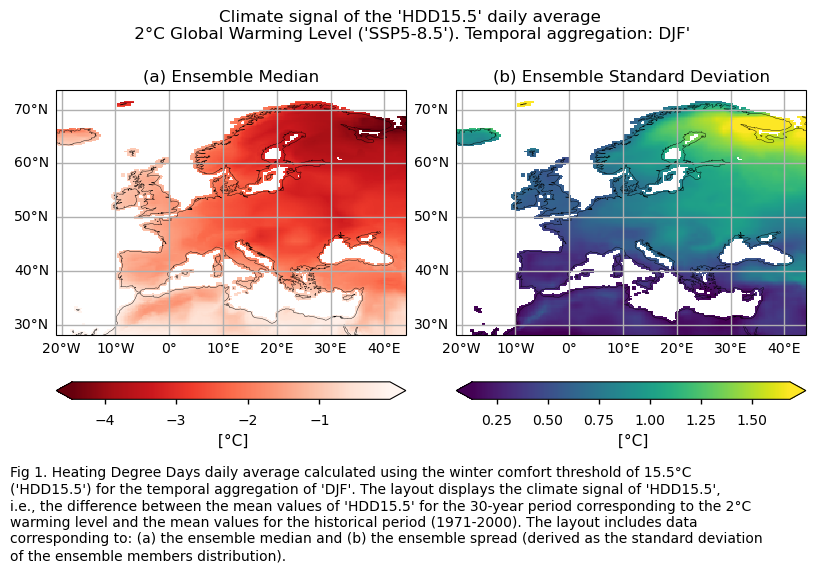

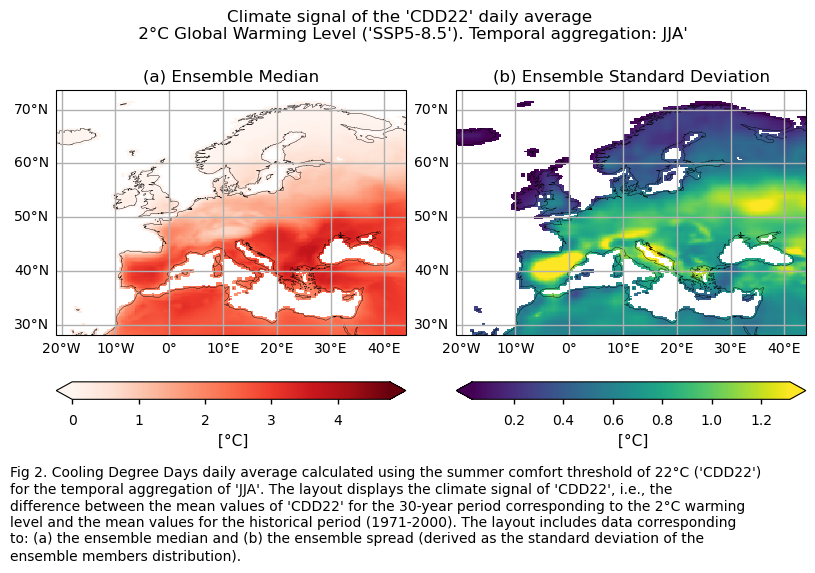

In [38]:
#Fig number counter
fig_number=1

#Common title
common_title = f"2°C Global Warming Level ('SSP5-8.5'). Temporal aggregation:"


for index in index_timeseries:
    # Index
    da = ds_interpolated[index]
    fig = plot_ensemble(
        da_models=da,
        cmap=cmaps_trends.get(index),
        cmap_bias=cmaps_bias.get(index),
    )
    fig.suptitle(f"Climate signal of the '{index}' daily average\n {common_title} {index_timeseries[index]}'",y=0.8)
    add_caption_ensemble(index=index)
    plt.show()
    fig_number=fig_number+1
    print(f"\n")

### 3.6.3. Plot model maps

In this section, we invoke the `plot_models()` function to visualize the climate signal for every model individually across Europe.

Specifically, for each of the indices ('HDD15.5' and CDD22'), this section presents a single layout including the climate signal of every model.


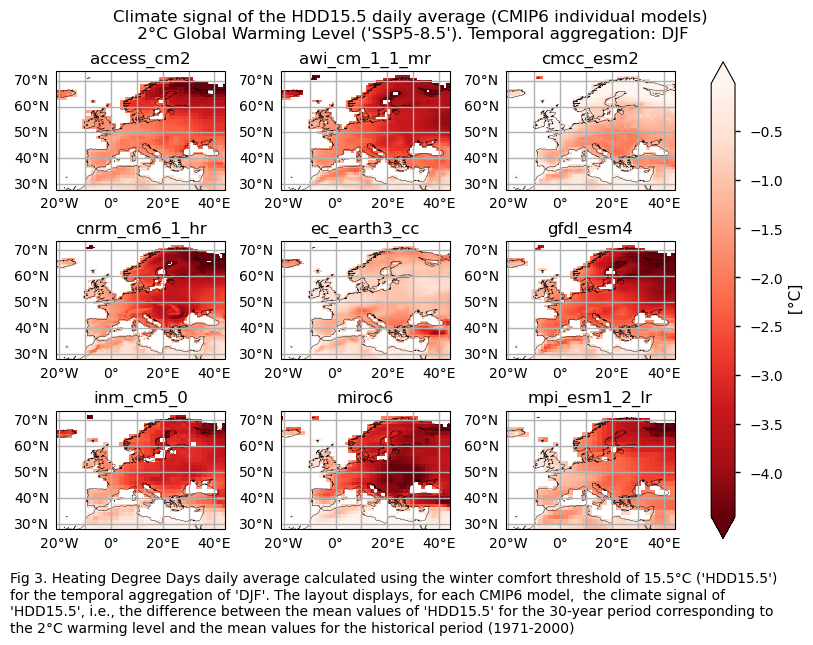

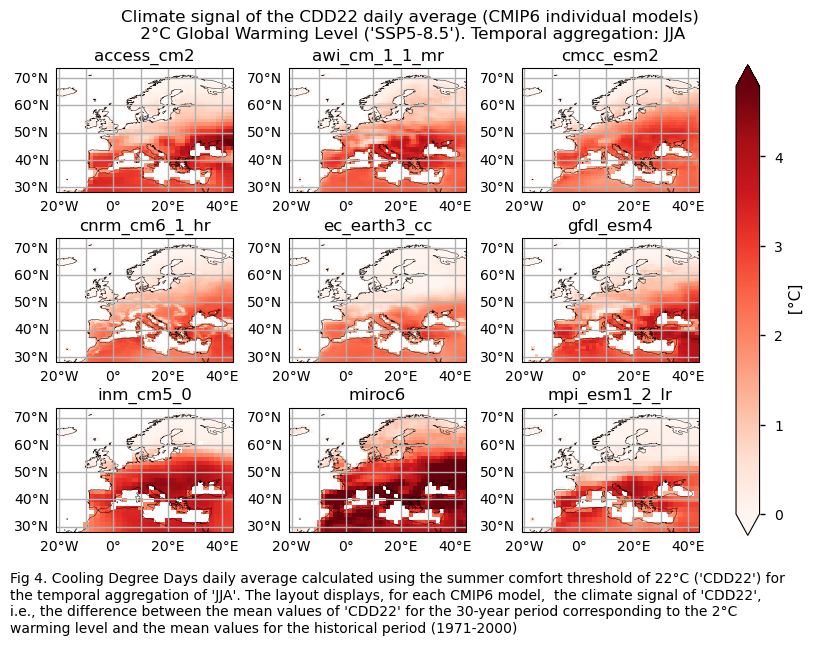

In [39]:
for index in index_timeseries:
    # Index
    da_for_kwargs = ds_interpolated[index]
    fig = plot_models(
        data={model: ds[index] for model, ds in model_datasets.items()},
        da_for_kwargs=da_for_kwargs,
        cmap=cmaps_trends.get(index),
    )
    fig.suptitle(f"Climate signal of the {index} daily average ({collection_id} individual models)\n {common_title} {index_timeseries[index]}")
    add_caption_models(index=index)
    plt.show()
    print(f"\n")
    fig_number=fig_number+1



### 3.6.4. Boxplots of the climate change signal

Finally, we present boxplots representing the ensemble distribution of each climate model signal for the 2°C global warming level.

Dots represent the spatially-averaged climate signal over the selected region for each model (grey) and the ensemble mean (blue). The ensemble median is shown as a green line.

The boxplot visually illustrates the distribution of the climate signal among the climate models, with the box covering the first quartile (Q1 = 25th percentile) to the third quartile (Q3 = 75th percentile), and a green line indicating the ensemble median (Q2 = 50th percentile). Whiskers extend from the edges of the box to show the full data range.

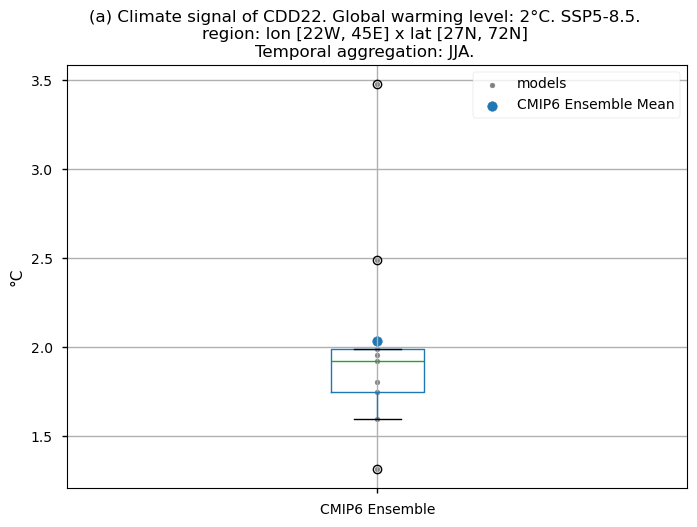

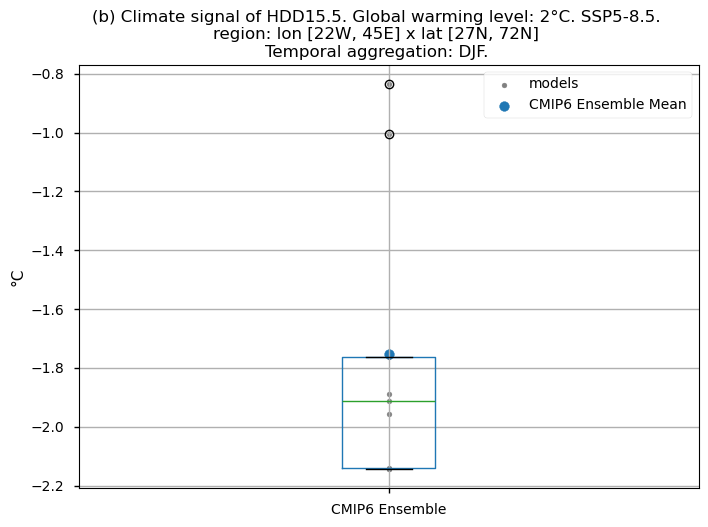

In [40]:
weights = True
mean_datasets = [
    diagnostics.spatial_weighted_mean(ds.expand_dims(model=[model]), weights=weights)
    for model, ds in model_datasets.items()
]
mean_ds = xr.concat(mean_datasets, "model")
index_str=1
for index, da in mean_ds.data_vars.items():
    df_slope = da.to_dataframe()[[index]]
    ax = df_slope.boxplot()
    ax.scatter(
        x=[1] * len(df_slope),
        y=df_slope,
        color="grey",
        marker=".",
        label="models",
    )

    # Ensemble mean
    ax.scatter(
        x=1,
        y=da.mean("model"),
        marker="o",
        label="CMIP6 Ensemble Mean",
    )

    labels = ["CMIP6 Ensemble"]
    ax.set_xticks(range(1, len(labels) + 1), labels)
    ax.set_ylabel(da.attrs["units"])
    plt.suptitle(
            f"({chr(ord('`')+index_str)}) Climate signal of {index}. Global warming level: 2°C. SSP5-8.5. \n"
            f"region: lon [{-area[1]}W, {area[3]}E] x lat [{area[2]}N, {area[0]}N] \n"
            f"Temporal aggregation: {index_timeseries[index]}. "
        ) 
    plt.legend()
    plt.show()
    index_str=index_str+1


**Fig 5.** Boxplots illustrating the climate signal (i.e., mean values for the warming level of 2°C compared to the historical period from 1971 to 2000) for the ensemble distribution of: (a) the 'CDD22' index, and (b) the 'HDD15.5' index. The distribution is created by considering spatially averaged values across Europe. The ensemble mean and the ensemble median are both included. Outliers in the distribution are denoted by a grey circle with a black contour.